 **<table><tr><font size=6 ><center>EE4211 Project -- Team name: WE </center></font></tr></table>**                          

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from datetime import datetime
import scipy.stats as stats
from sklearn import metrics

### Import csv data and split data in groups with meter_ID

In [3]:
data=pd.read_csv('dataport-export_gas_oct2015-mar2016.csv')
data_sort = data.sort_index(by=['dataid','localminute'])
data_sort.head()

C:\Users\dell\AppData\Roaming\Python\Python36\site-packages\ipykernel_launcher.py:2: FutureWarning: by argument to sort_index is deprecated, pls use .sort_values(by=...)
  


,localminute,dataid,meter_value
83,2015-10-01 00:14:44-05,35,93470
244,2015-10-01 00:42:34-05,35,93470
723,2015-10-01 02:02:37-05,35,93470
790,2015-10-01 02:12:38-05,35,93470
829,2015-10-01 02:20:36-05,35,93470


## Q1.1 Counting number of houses and malfunctioning meters

### 1.Counting number of houses. Define every house has one meter, and we can count the number of house by the number of meter's id

In [4]:
id_num=data_sort['dataid'].value_counts()
print("The number of houses is {}.".format(len(id_num)))

The number of houses is 157.


### 2.Counting the number of malfunctioning meters and find out their malfunctioning period time.

**Define the meter is normal if the difference between two adjacent records in one meter is smaller enough . According to this rule, we find the mulfunctioning meters.**

#### 2.1.Calculate how many time every meter is shown in the original record and order them according to the ascending dataid.

In [5]:
dupli_num=data['dataid'].value_counts()
dupli_num=dupli_num.sort_index()
dupli_num=dupli_num.as_matrix()

#### 2.2. Calculate the difference between adjacent record in one meter and record it in the second record of the two records. Set the first one's difference to be 0 in one meter. In this way every record has another feature, which is the difference, and we call it 'diff'.

In [6]:
count=0
diff_record= pd.Series([],index=[])
diff_time= pd.Series([],index=[])
for i in range(157):
    begin=count
    end=begin+dupli_num[i]
    sample=data_sort.iloc[begin:end]
    difference=sample["meter_value"]-sample["meter_value"].shift(1)
    difference=difference.fillna(0)
    diff_record=diff_record.append(difference)
    dtime=sample["localminute"].shift(1)
    dtime=dtime.fillna(0)
    diff_time=diff_time.append(dtime)
    count=end
    

In [7]:
datasort_d=data_sort
datasort_d.insert(3, 'diff', diff_record)
datasort_d.insert(4,'diff_time', diff_time)

#### 2.3. Plot the difference. The x axis is the asscending index in each meter and all of the meters are in asscending order. In this way, we could observe the range of difference for the whole data.

Text(0.5,1,'Difference of every record')

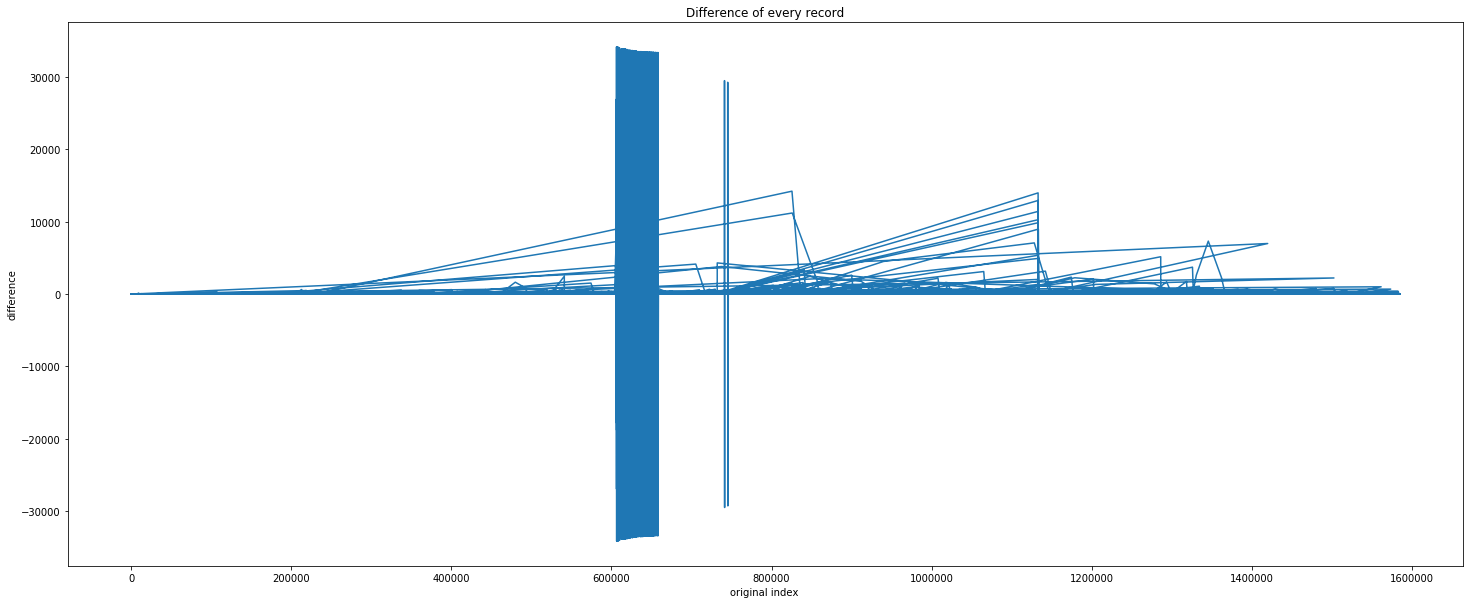

In [8]:
fig, ax=plt.subplots(1,1,figsize=(25,10))
ax.plot(diff_record)
plt.xlabel("original index ")
plt.ylabel("difference")
ax.set_title("Difference of every record")

#### 2.4. From the negative difference , we find one big jump from -50 to -8435 to -50. thus, we think a  meter must be malfunctioning if it has the phenomenon that the abs of one  difference is bigger than 8000 (24 meters). But for the positive, we find that the differences have several different levels. According to the rule that  the meter sends message every 15 seconds. If the difference is between 1000 and 8000 (24 meters), the meter has a chance to be malfunctioning. 

In [9]:
error_8000=datasort_d[(data_sort["diff"]<-8000)|(data_sort["diff"]>8000)]
error_8000.to_csv(r'./error_8000.csv')
dupli_e8000=error_8000['dataid'].value_counts()
dupli_e8000=dupli_e8000.sort_index()
dupli_e8000=dupli_e8000.as_matrix()

In [10]:
count=0
i=0
print("The total number of definitely malfunctioning meter is {}.\n"
      .format(len(dupli_e8000)))
for i in range(len(dupli_e8000)):
    begin=count
    end=begin+dupli_e8000[i]
    sample=error_8000.iloc[begin:end]
    e_dataid=sample['dataid']
    e_dataid=e_dataid.head(1)
    #print(sample.head())
    l_time=sample['localminute']
    d_time=sample['diff_time']
    begin_time=d_time.head(1)
    end_time=l_time.tail(1)
    print("The period time when meter {} is malfunctioning is\n from {} to {}\n "
          .format(e_dataid.values,begin_time.values,end_time.values))
    count=end

The total number of definitely malfunctioning meter is 24.

The period time when meter [1185] is malfunctioning is
 from ['2015-12-07 16:42:02-06'] to ['2015-12-13 01:27:54-06']
 
The period time when meter [1556] is malfunctioning is
 from ['2015-12-07 23:12:42-06'] to ['2015-12-11 02:14:36-06']
 
The period time when meter [2233] is malfunctioning is
 from ['2016-01-03 09:32:01.486155-06'] to ['2016-02-04 14:31:23.178995-06']
 
The period time when meter [2335] is malfunctioning is
 from ['2015-12-08 16:20:26-06'] to ['2015-12-11 23:52:27-06']
 
The period time when meter [2449] is malfunctioning is
 from ['2015-12-07 16:44:19-06'] to ['2015-12-13 01:34:19-06']
 
The period time when meter [2638] is malfunctioning is
 from ['2015-12-21 00:30:35.46372-06'] to ['2016-02-04 13:11:12.335343-06']
 
The period time when meter [3134] is malfunctioning is
 from ['2015-12-08 06:39:38-06'] to ['2015-12-12 17:10:28-06']
 
The period time when meter [3544] is malfunctioning is
 from ['2015-12-07

In [11]:
error_1_8=datasort_d[(datasort_d["diff"]<8000)&(data_sort["diff"]>1000)]
error_1_8.to_csv(r'./error_1000_8000.csv')
dupli_e1_8=error_1_8['dataid'].value_counts()
dupli_e1_8=dupli_e1_8.sort_index()
dupli_e1_8=dupli_e1_8.as_matrix()

In [12]:
count=0
i=0
print("The total number of this kind meter, difference in [1000,8000] is {}.\n"
      .format(len(dupli_e1_8)))
for i in range(len(dupli_e1_8)):
    begin=count
    end=begin+dupli_e1_8[i]
    sample=error_1_8.iloc[begin:end]
    e_dataid=sample['dataid']
    e_dataid=e_dataid.head(1)
    l_time=sample['localminute']
    d_time=sample['diff_time']
    begin_time=d_time.head(1)
    end_time=l_time.tail(1)
    print("The period time when meter {} is malfunctioning is\n from {} to {}\n "
          .format(e_dataid.values,begin_time.values,end_time.values))
    count=end

The total number of this kind meter, difference in [1000,8000] is 24.

The period time when meter [222] is malfunctioning is
 from ['2015-11-22 04:37:44-06'] to ['2016-03-01 13:43:27.263188-06']
 
The period time when meter [2233] is malfunctioning is
 from ['2015-12-20 22:12:53.470997-06'] to ['2016-01-03 00:05:04.299774-06']
 
The period time when meter [2645] is malfunctioning is
 from ['2015-11-14 19:04:27-06'] to ['2016-01-11 09:55:30.94391-06']
 
The period time when meter [2814] is malfunctioning is
 from ['2016-01-17 01:24:17.108439-06'] to ['2016-02-27 07:37:01.560877-06']
 
The period time when meter [2818] is malfunctioning is
 from ['2015-12-21 03:22:05-06'] to ['2016-01-12 21:26:11.776154-06']
 
The period time when meter [3039] is malfunctioning is
 from ['2015-12-20 23:15:07.73569-06'] to ['2016-02-04 13:07:41.103166-06']
 
The period time when meter [4193] is malfunctioning is
 from ['2015-12-28 16:36:13-06'] to ['2015-12-31 07:56:14.242899-06']
 
The period time when m

## Q1.2  Genarate hourly meter readings from the raw data

### 1. Modify the format of data and select all meter readings in October,2015 ordered by meter_id and localminute

In [12]:
#preprocess datetime into the same format
date_time = []
for i in range(data_sort.shape[0]):
    date_time.append(data_sort['localminute'][i:i+1].values[0][:19]) 

month = np.zeros(data_sort.shape[0])
day = np.zeros(data_sort.shape[0])
hour = np.zeros(data_sort.shape[0])
for row in range(data_sort.shape[0]):
    month[row] = int(date_time[row][5:7])
    day[row] = int(date_time[row][8:10])
    hour[row] = int(date_time[row][11:13])
#extract month,day and hour respectively
data_sort['month'] = month
data_sort['day'] = day
data_sort['hour'] = hour
#select October to plot hourly meter readings 
df=data_sort[data_sort['month']==10]
#adjust the order of columns 
df_month = df[['dataid','localminute','month','day','hour','meter_value']]
#calculate the number of meters with readings in October
id_count = df_month['dataid'].value_counts()
print('number of meters:',len(id_count))
df_month.head()

number of meters: 142


,dataid,localminute,month,day,hour,meter_value
83,35,2015-10-01 00:14:44-05,10.0,1.0,0.0,93470
244,35,2015-10-01 00:42:34-05,10.0,1.0,0.0,93470
723,35,2015-10-01 02:02:37-05,10.0,1.0,2.0,93470
790,35,2015-10-01 02:12:38-05,10.0,1.0,2.0,93470
829,35,2015-10-01 02:20:36-05,10.0,1.0,2.0,93470


### 2. Missing value handling:

**(1) For each meter, we select the first record in each hour, with assumption that we reserve the readings at the beginning of each hour and keep the readings until the first record in next hour comes out.Although the time of first readings in each hour cannot be the same, we still keep it as the assumption of hourly readings with concession of accuracy to some extent. (2) When there is no reading in certain hour for a meter, we need to fill up the values according to the actual condition.Here we assume that if there is no reading during one hour period, we just maintain the last reading record.That means, we believe there is no additional cost of gas during this period.Actually, there are other ways such as regarding the average of last readings and next readings as the vacant value.**

In [13]:
#set one meter as an example to explain how we deal with vacant readings
meter_value_month = df_month[df_month['dataid']==9134]
result = np.zeros(744)
for j in range(1,32):
    meter_value_day = meter_value_month[meter_value_month['day']==j]
    if meter_value_day.empty:
        continue
    for k in range(24):
        meter_value_hour = meter_value_day[meter_value_day['hour']==k]
        if meter_value_hour.empty:
            continue
        result[(j-1)*24+k] = int(meter_value_hour['meter_value'][0:1].values)
print('readings before processing:\n',result)
vac = np.where(result == 0)[0]
non_vac = np.nonzero(result)[0]
left = non_vac[0]
result1 = result
#if there is no reading at the first hour of the month,
#find the first nonvacant value and regard it as the first value
if 0 in vac:
    result1[0]= result[left]
    vac = vac[1:]
#if there are vacant values during certain hours, 
#regard the last reading as the value in this hour
for num in vac:
    result1[num]=result[num-1]
print('readings after processing:\n',result1)

readings before processing:
 [230534. 230534. 230536. 230536. 230536. 230536. 230536. 230538. 230538.
 230546. 230546. 230548. 230548. 230548. 230548. 230548. 230550. 230550.
 230550. 230550. 230552. 230552. 230562. 230562. 230562. 230562. 230562.
 230564. 230564.      0. 230564. 230564. 230566. 230566. 230566. 230566.
 230566. 230568. 230568. 230568. 230568. 230568. 230570. 230570. 230570.
 230570. 230570. 230572. 230572. 230572. 230572. 230572. 230574. 230574.
 230574. 230574. 230574. 230576. 230576. 230576. 230576. 230578. 230586.
 230586.      0. 230586. 230588. 230588. 230588. 230588. 230590. 230590.
 230590. 230590. 230590. 230592. 230592. 230592. 230592. 230592. 230594.
 230594. 230594. 230594. 230594. 230596. 230596. 230596.      0.      0.
      0. 230598. 230598. 230610. 230610. 230610. 230612. 230612. 230612.
 230612. 230614. 230614. 230614. 230614. 230614. 230616. 230616. 230616.
 230616. 230618. 230618. 230618. 230618. 230618. 230620. 230620. 230620.
 230620. 230630. 23063

### 3. Plot all meter readings in a common figure: 
**Here we put all lines (142 meters in October) in one figure and find it is difficult to see the trend of each meter reading with time. The reason is that the accumulating value at the beginning are varying greatly for different meters. **

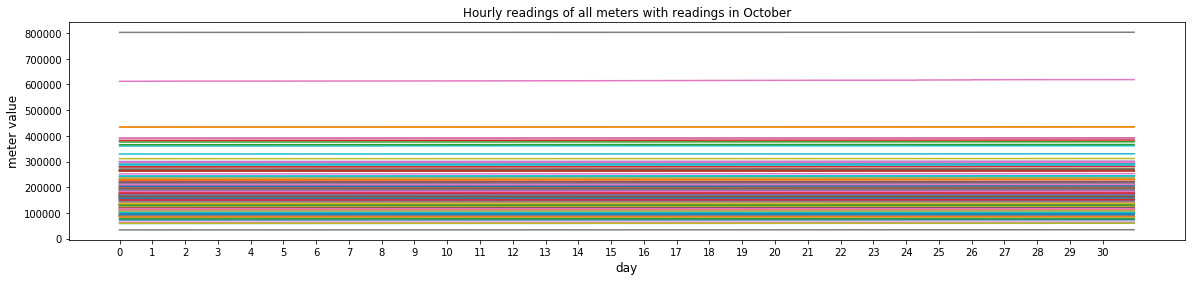

In [14]:
meter = id_count.index
plt.figure(figsize=(20,4))
for i in meter:
    meter_value_month = df_month[df_month['dataid']==i]
    result = np.zeros(744)
    for j in range(1,32):
        meter_value_day = meter_value_month[meter_value_month['day']==j]
        if meter_value_day.empty:
            continue
        for k in range(24):
            meter_value_hour = meter_value_day[meter_value_day['hour']==k]
            if meter_value_hour.empty:
                continue
            result[(j-1)*24+k] = int(meter_value_hour['meter_value'][0:1].values)
    vac = np.where(result == 0)[0]
    non_vac = np.nonzero(result)[0]
    left = non_vac[0]
    if 0 in vac:
        result[0]= result[left]
        vac = vac[1:]
    for num in vac:
        result[num]=result[num-1]
    #print(result)
    plt.plot(result)
plt.xlabel('day',fontsize=12)
plt.ylabel('meter value',fontsize=12)
plt.xticks(np.arange(744)[::24],np.arange(31))
plt.title('Hourly readings of all meters with readings in October')
plt.show()  

### 4. Plot each meter readings in a single figure: 
**In order to have a clear obervation of the trend of meter readings, we plot the hourly readings during the whole October for each meter.It is obvious to understand that the meters with linear smooth curves (such as ID 1086) are tending to be normal.However, for those with dramatical descend,ascend or vibration(such as ID 1103), they have a higher probability to be malfunctioning.**

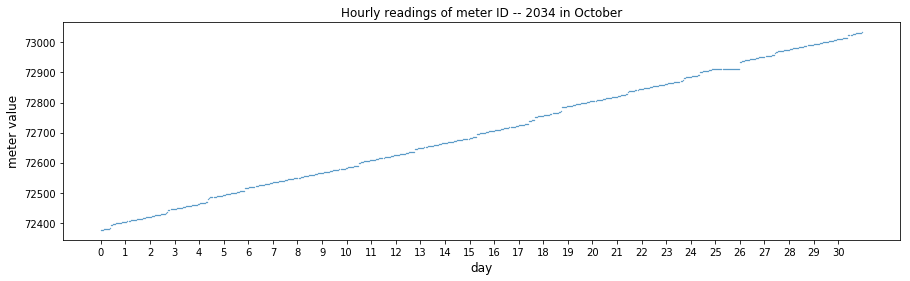

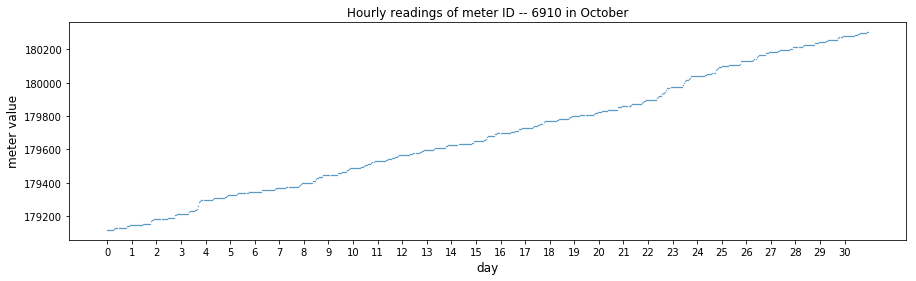

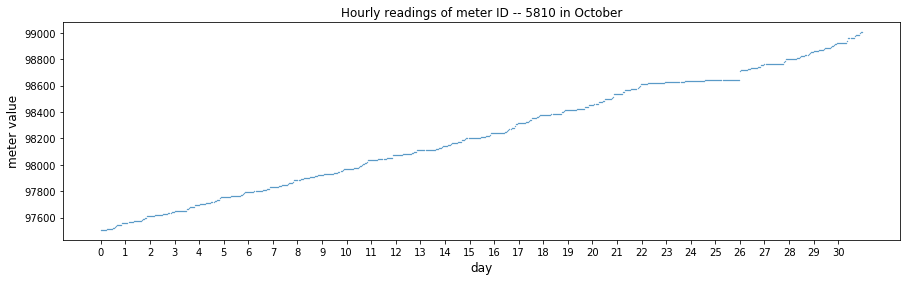

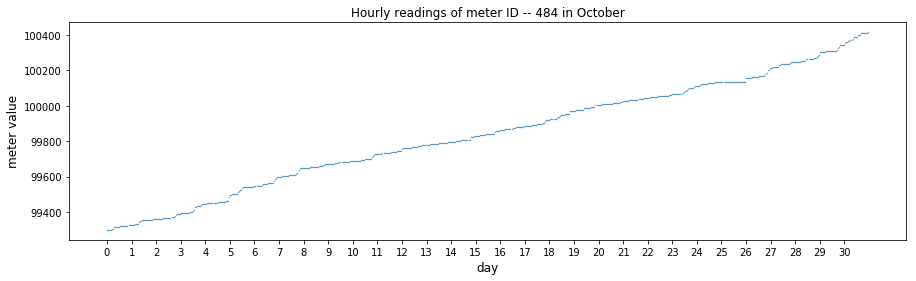

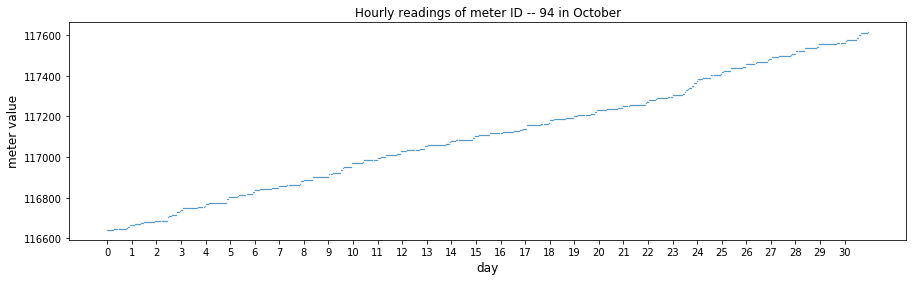

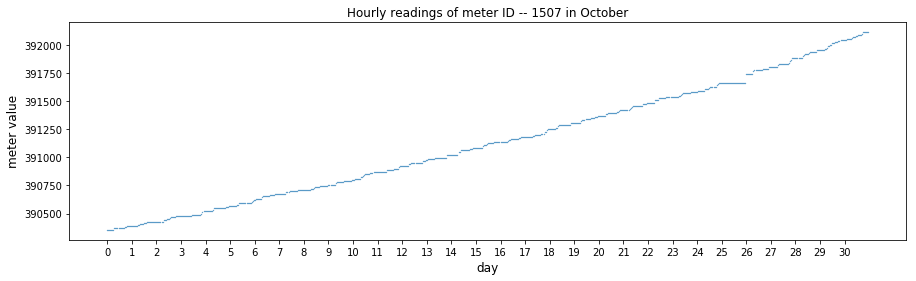

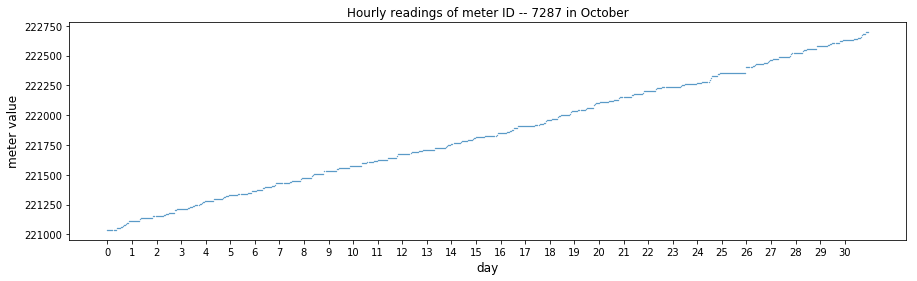

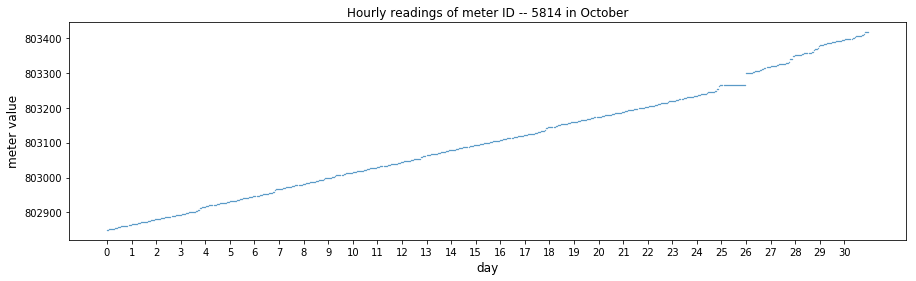

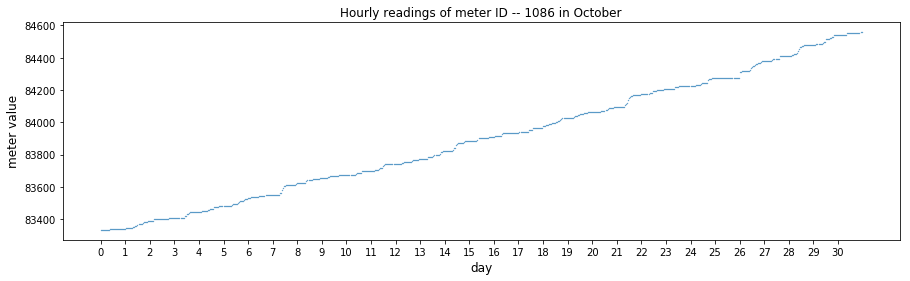

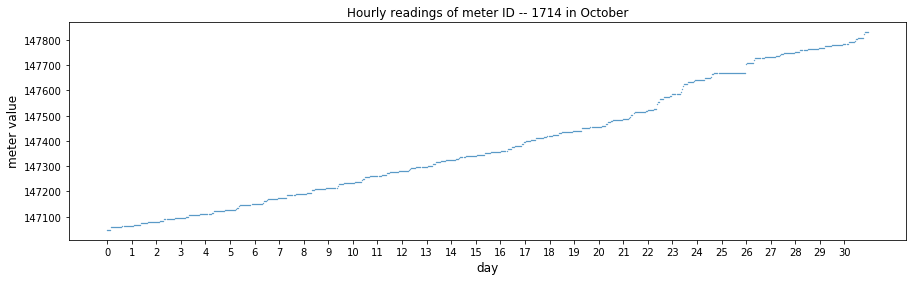

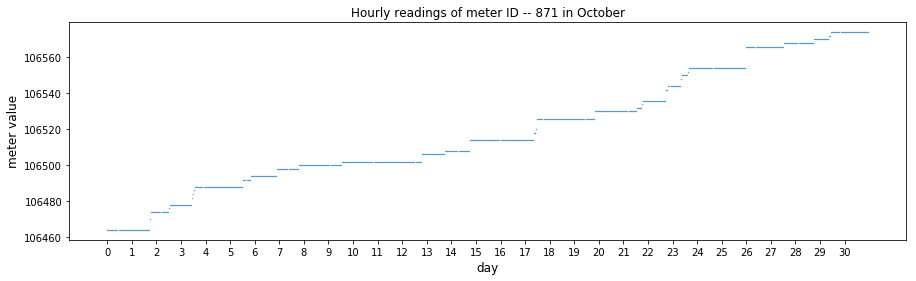

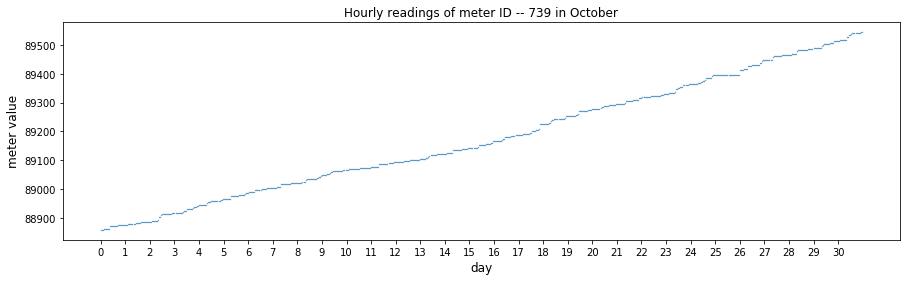

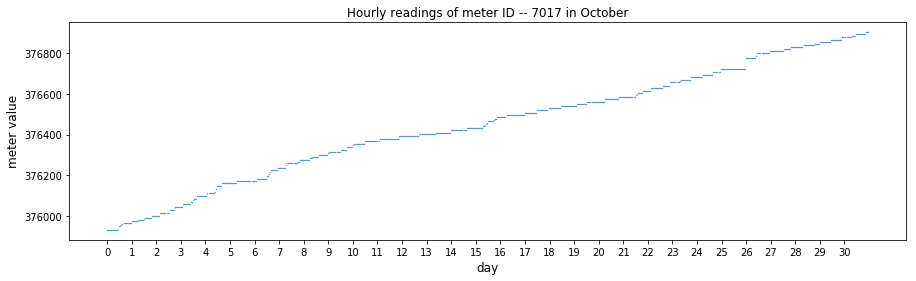

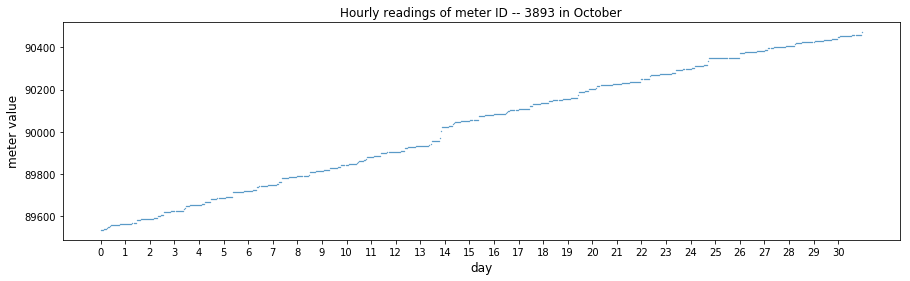

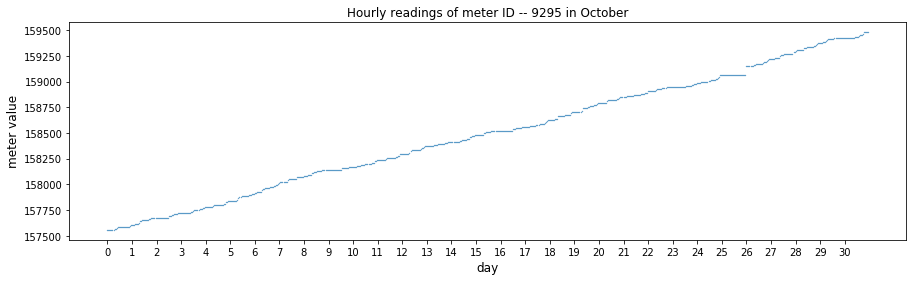

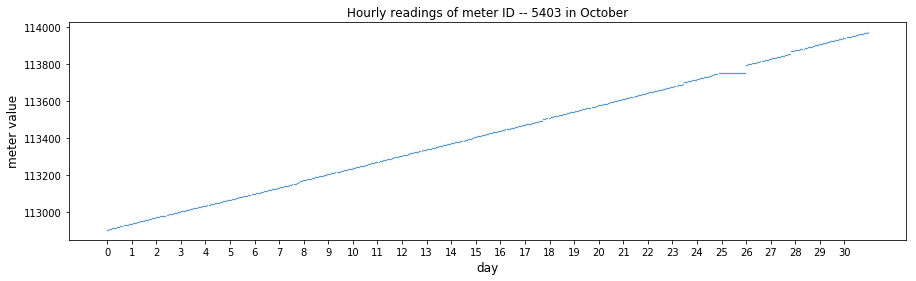

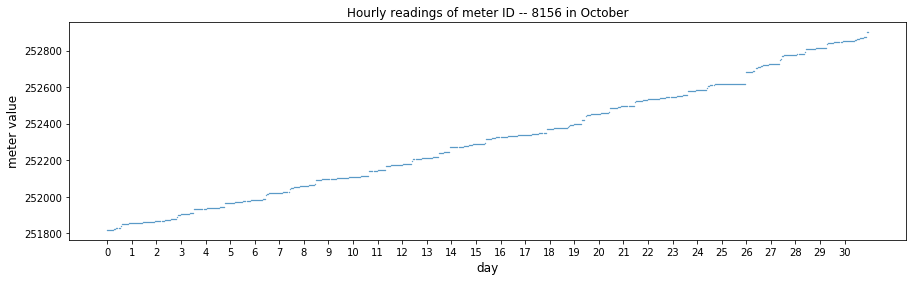

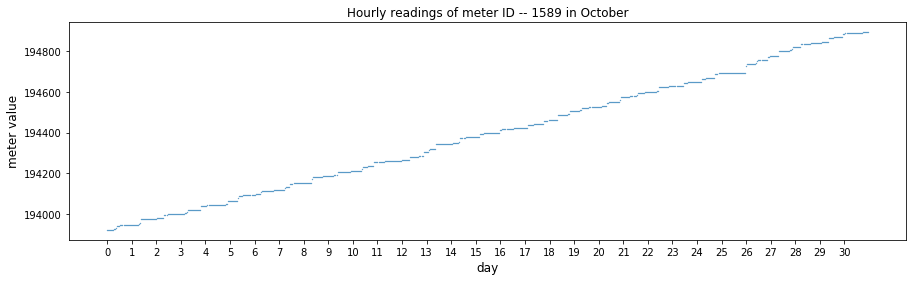

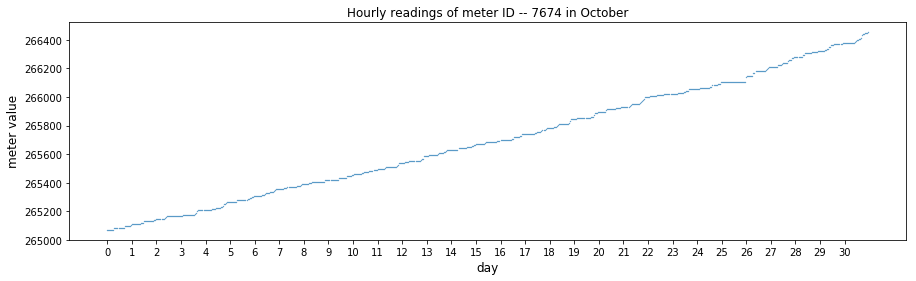

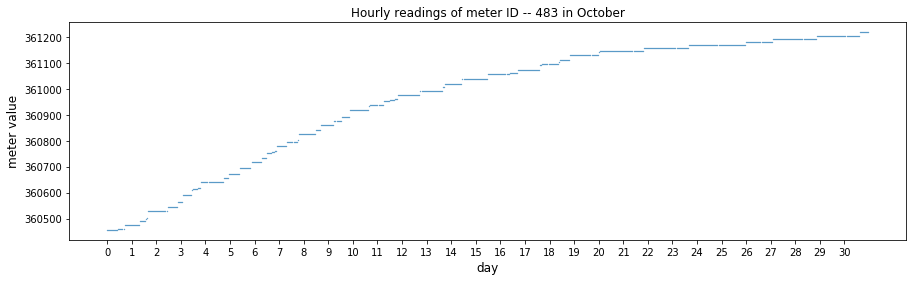

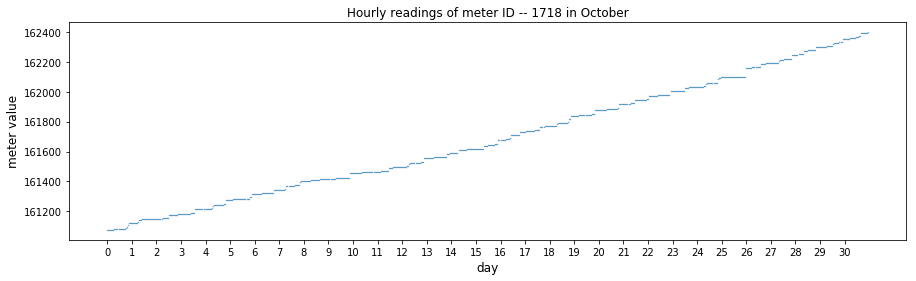

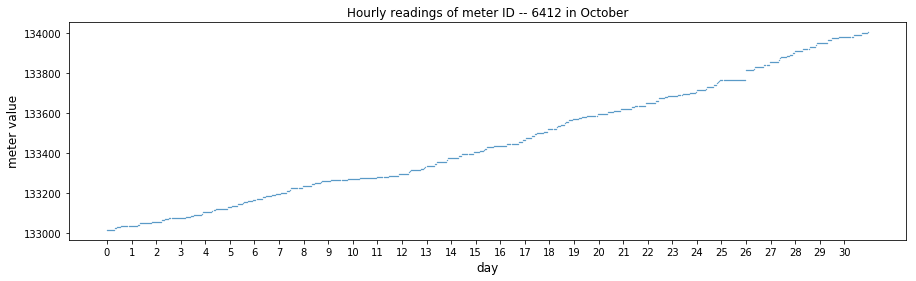

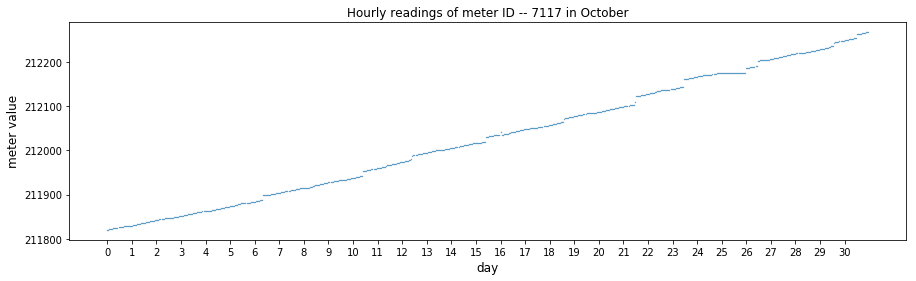

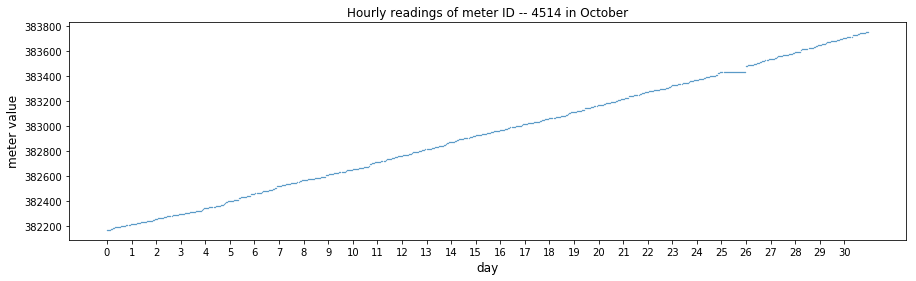

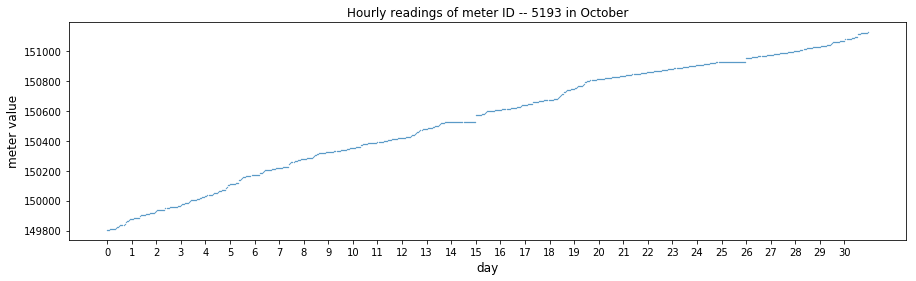

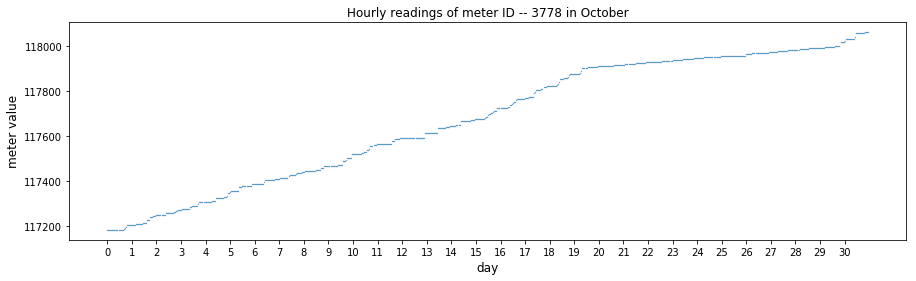

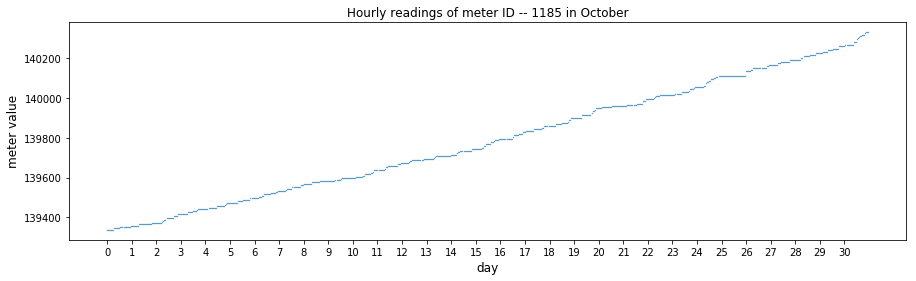

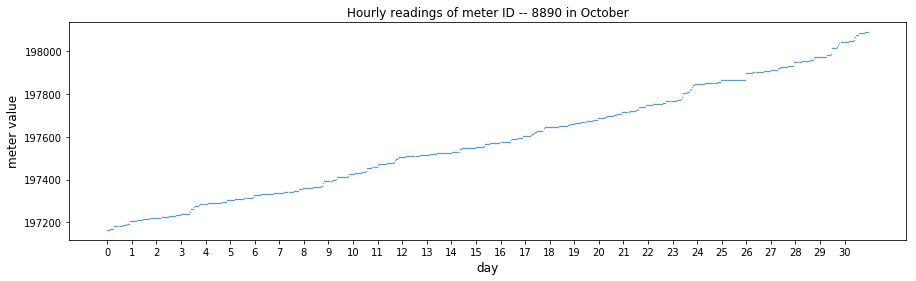

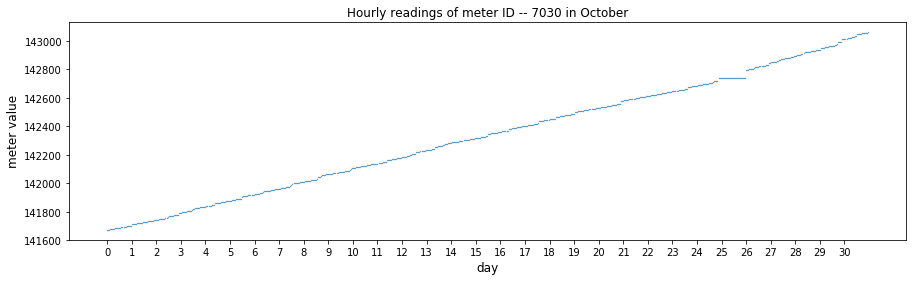

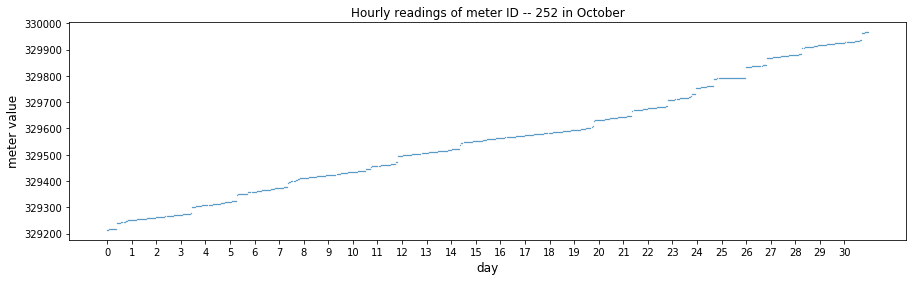

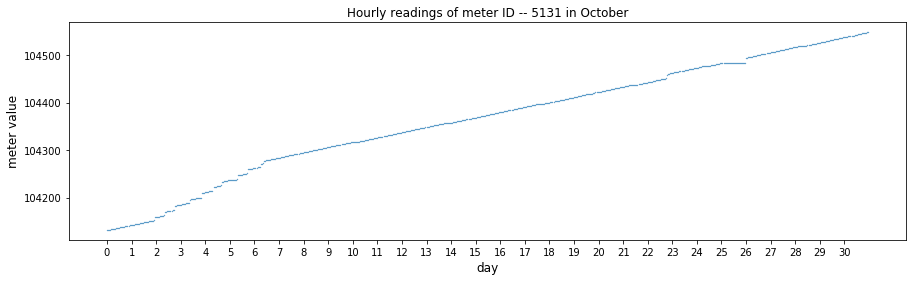

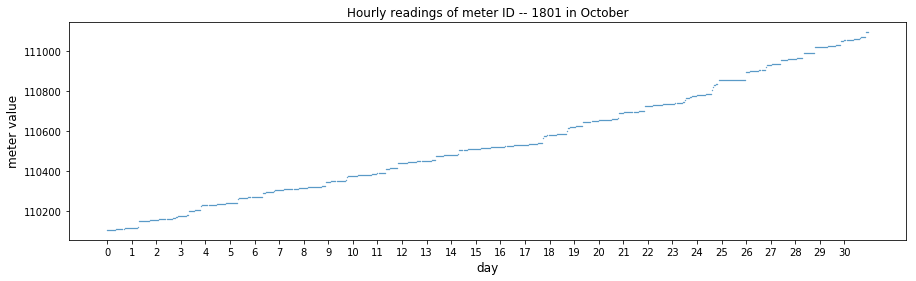

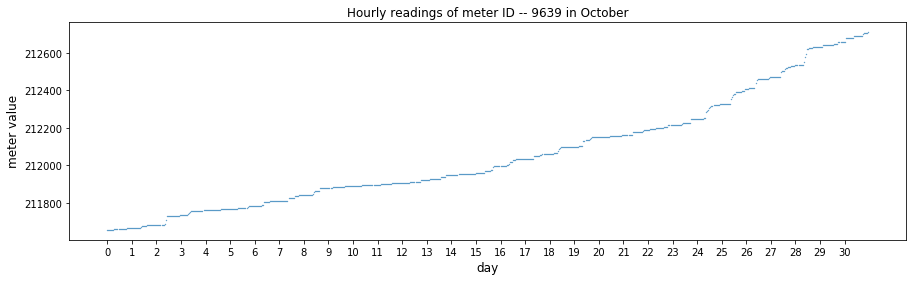

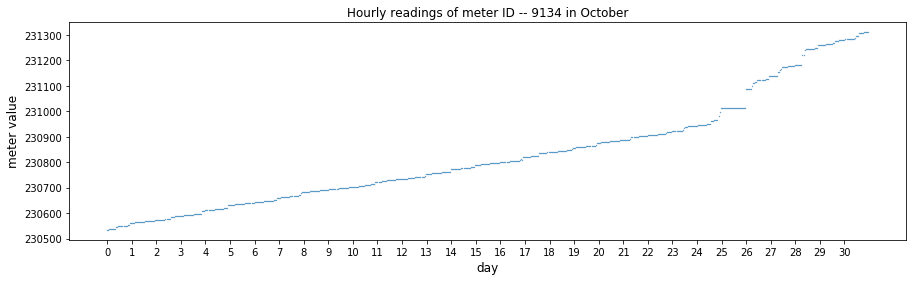

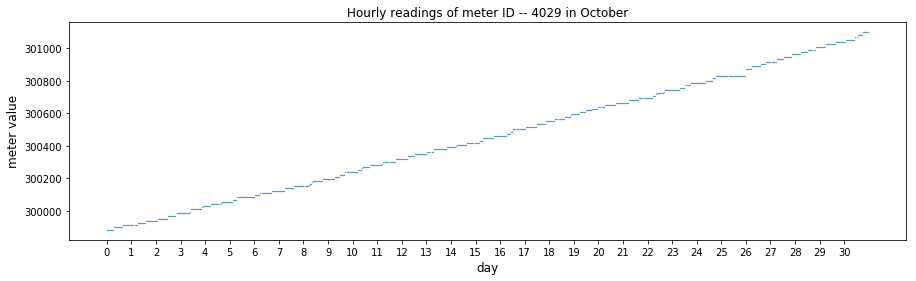

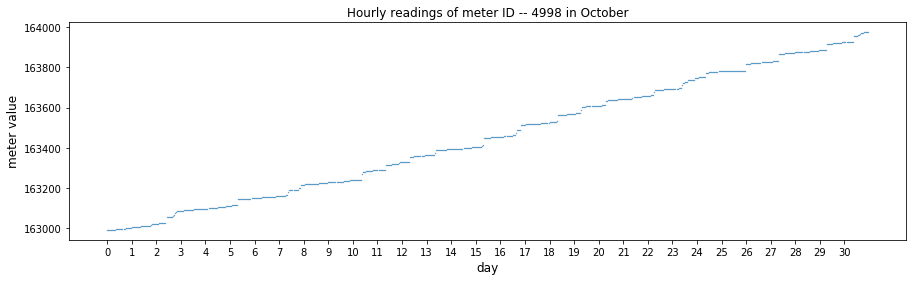

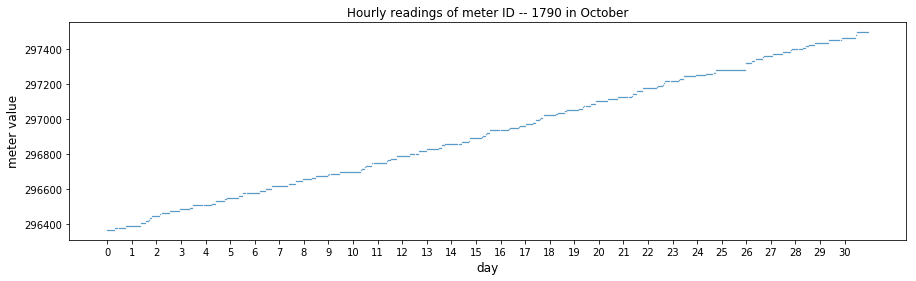

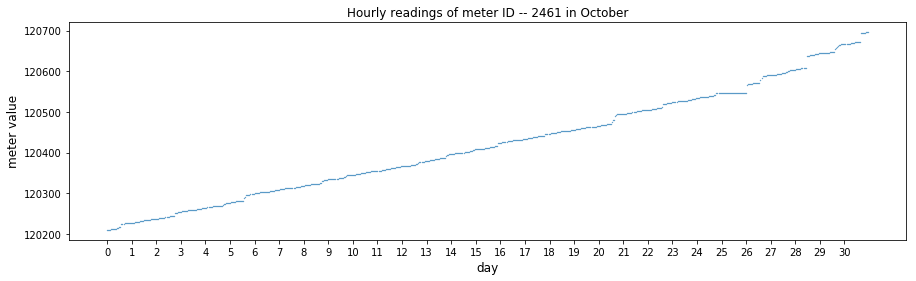

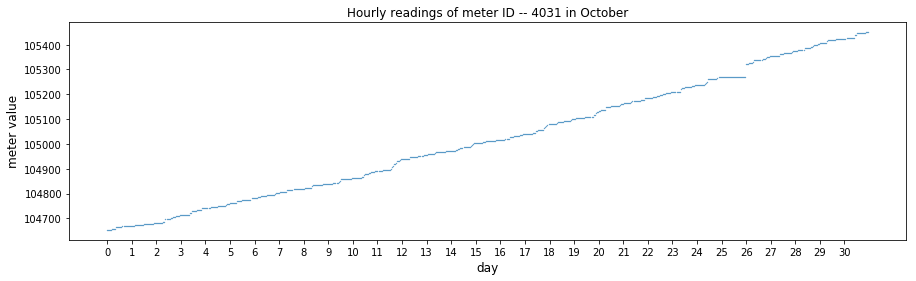

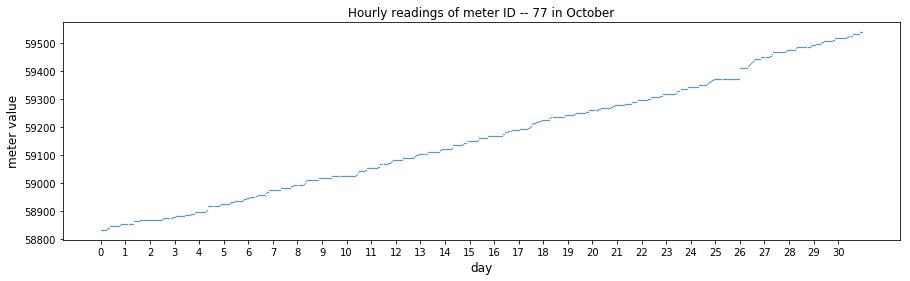

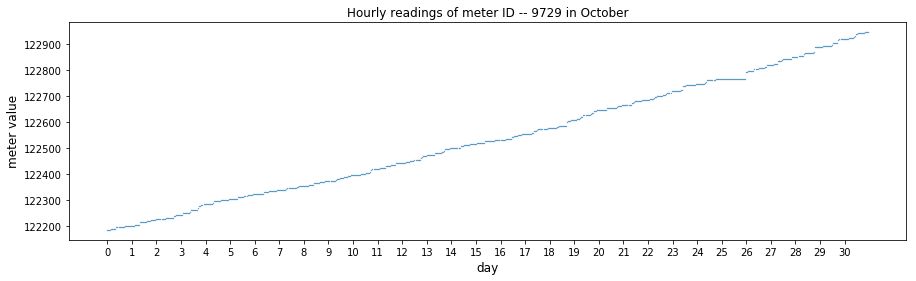

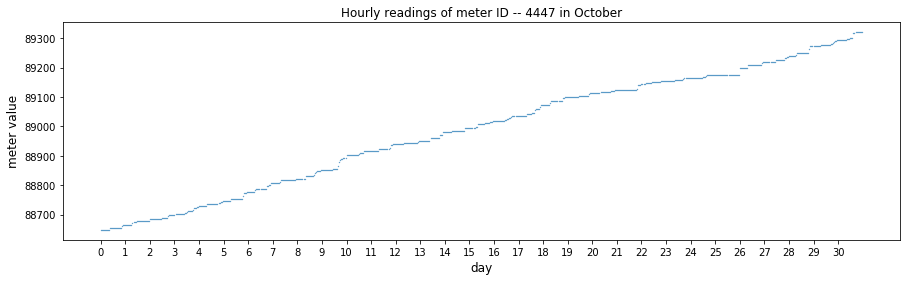

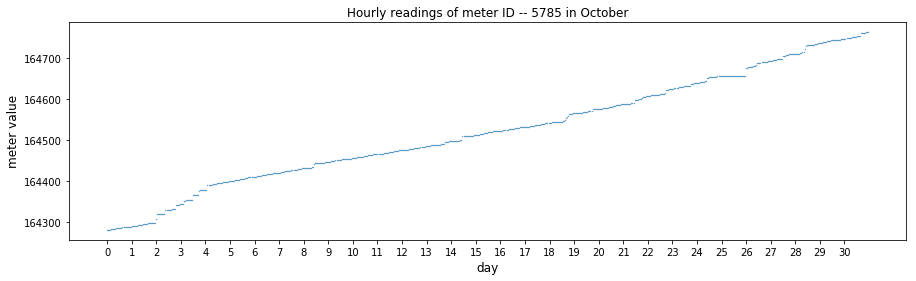

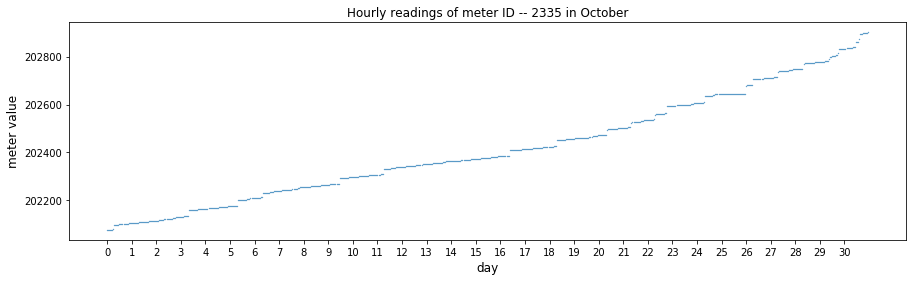

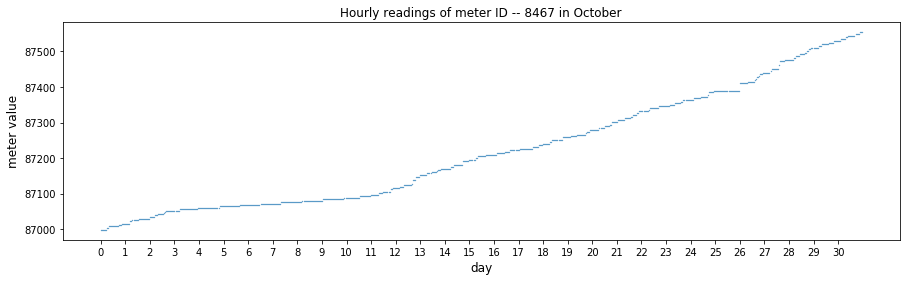

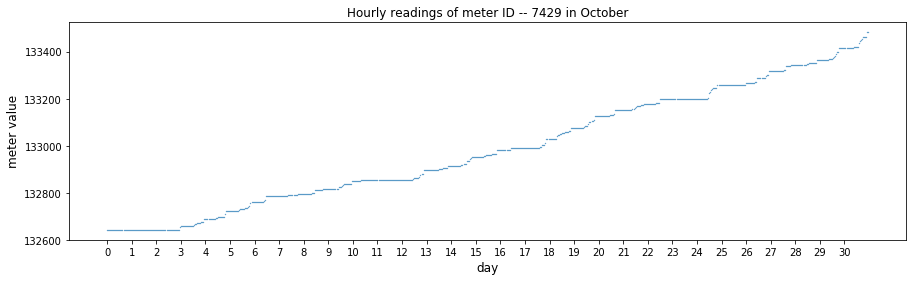

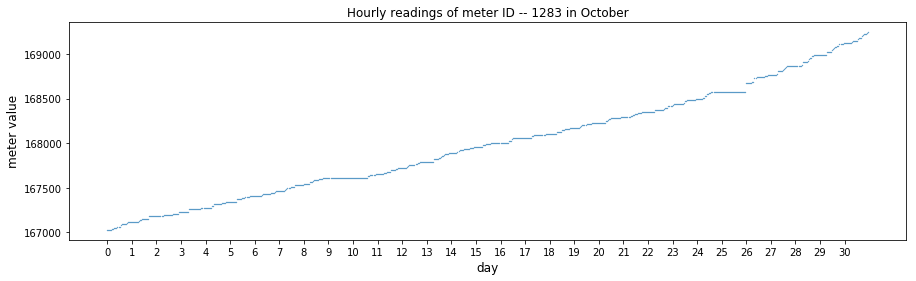

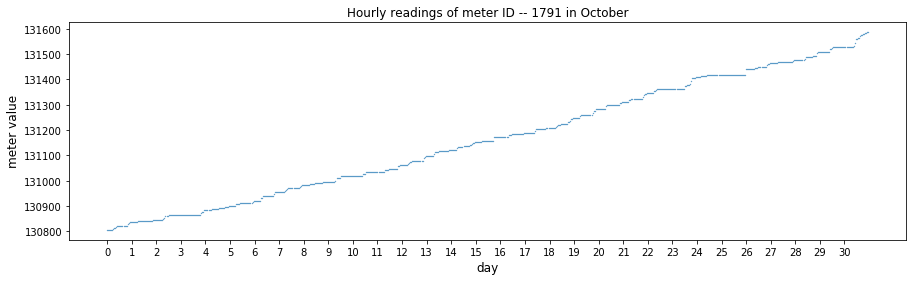

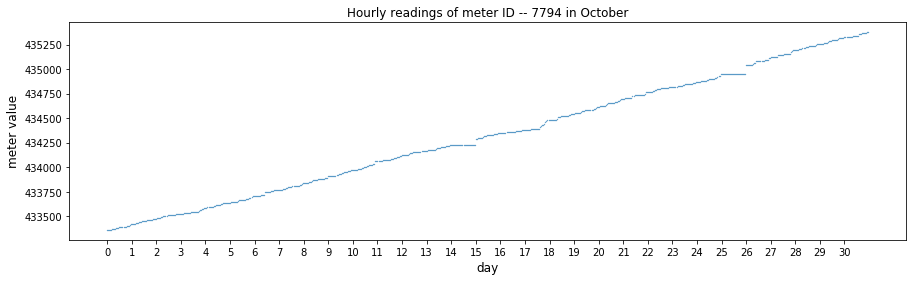

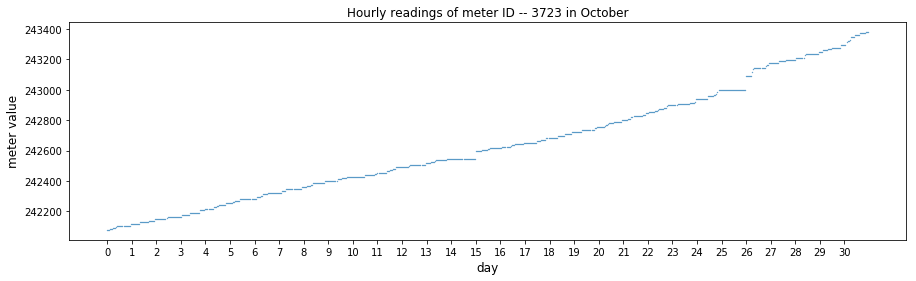

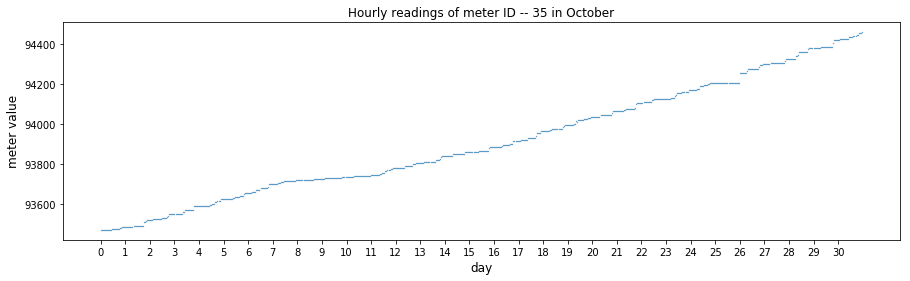

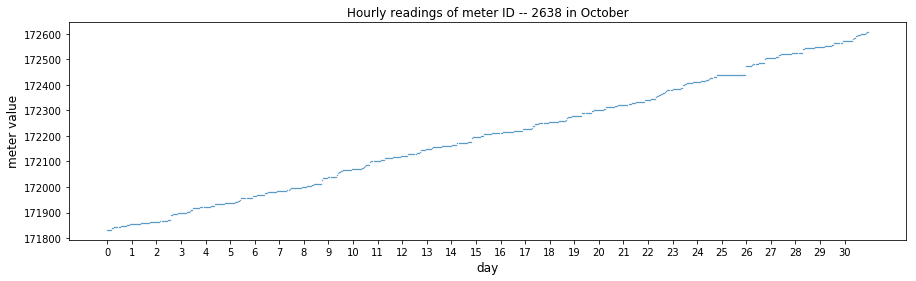

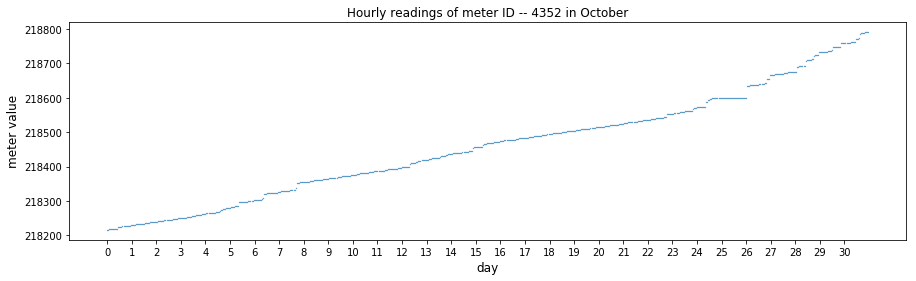

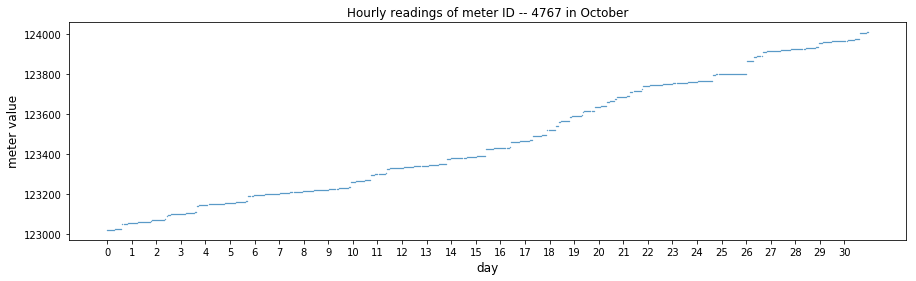

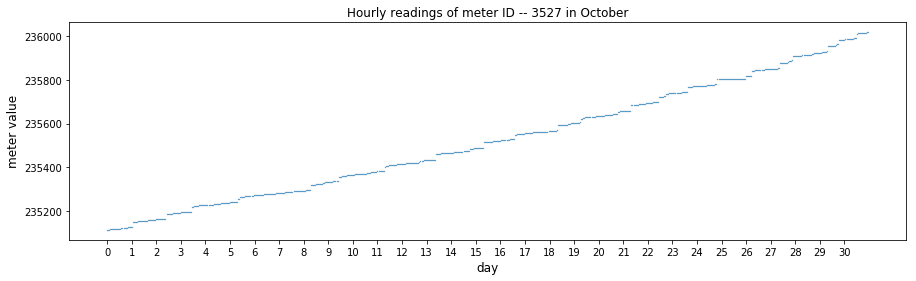

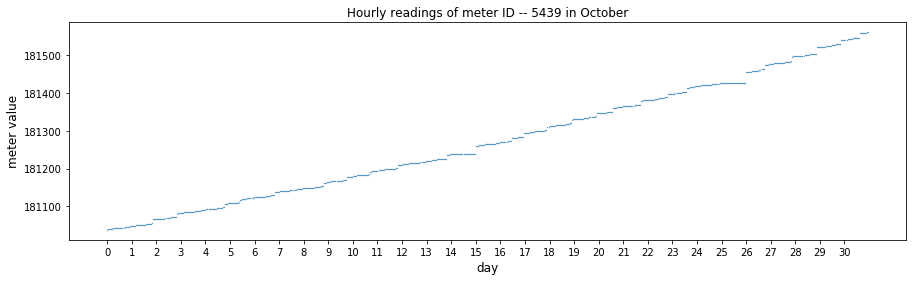

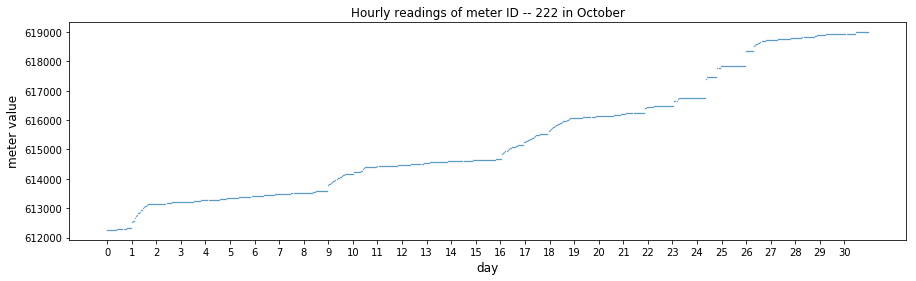

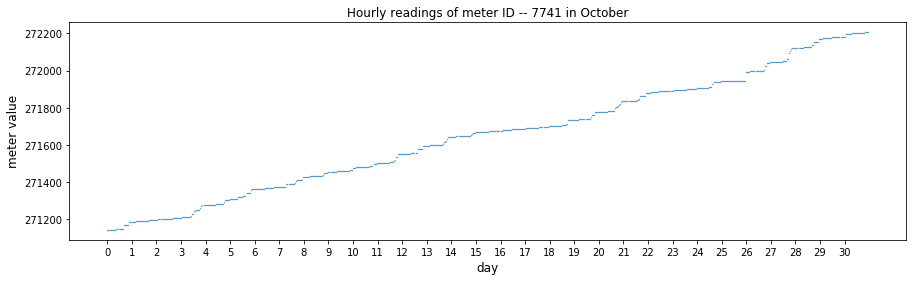

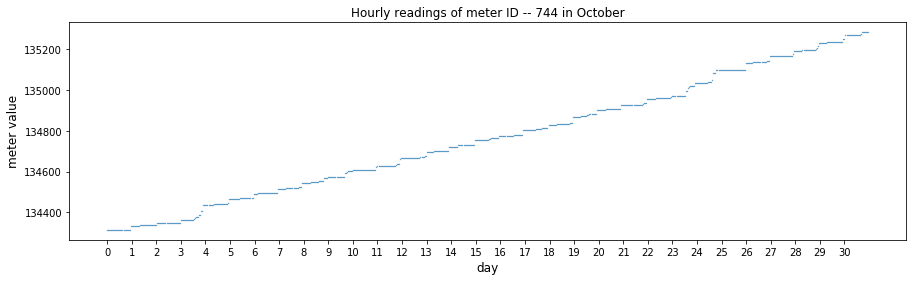

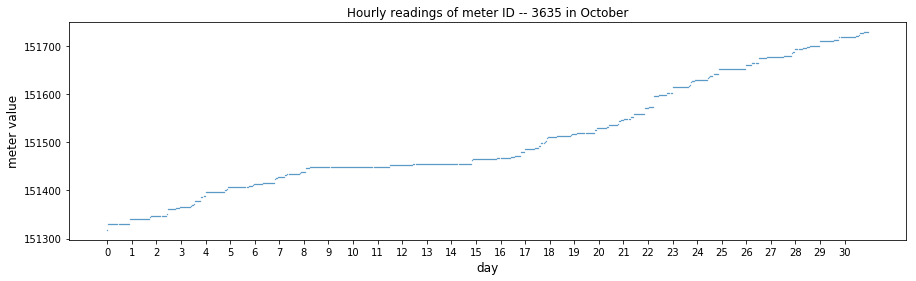

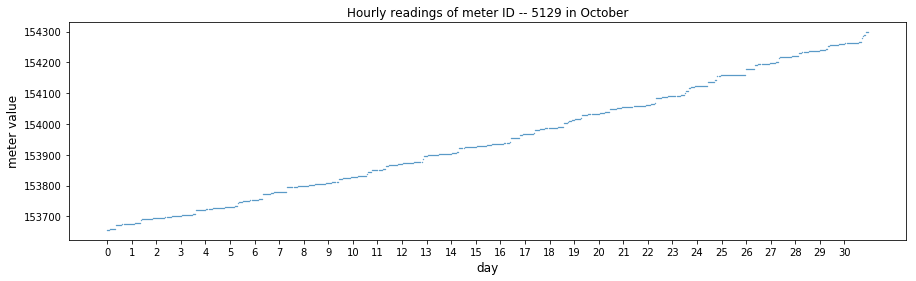

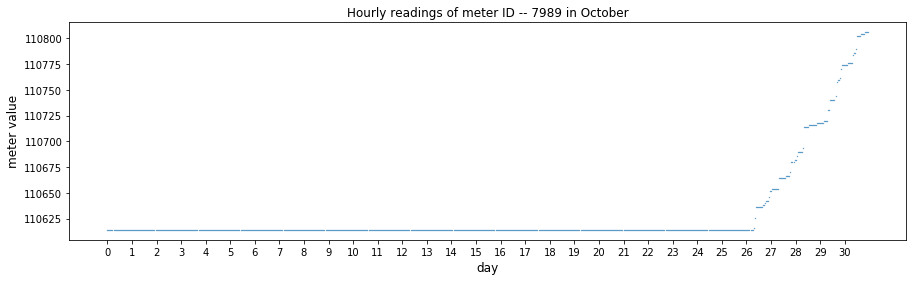

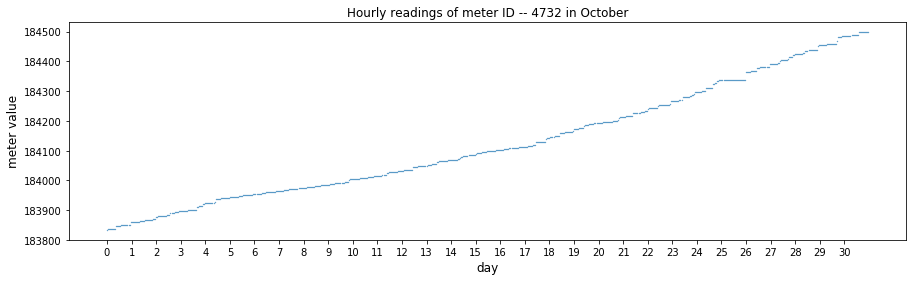

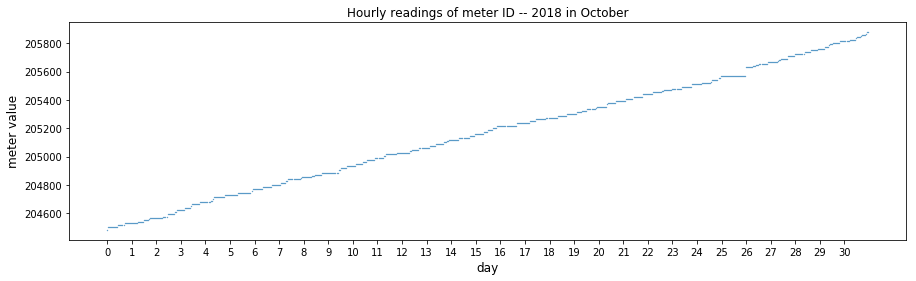

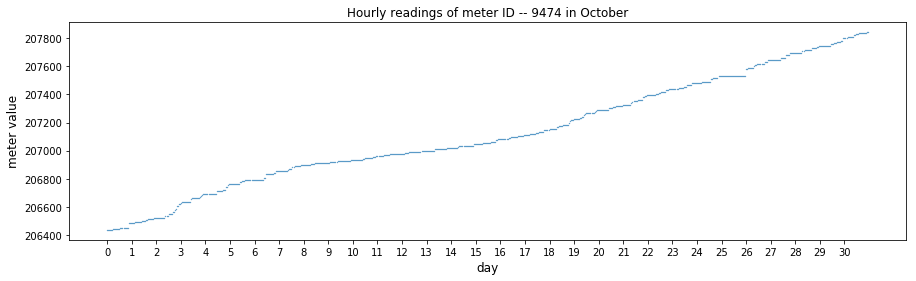

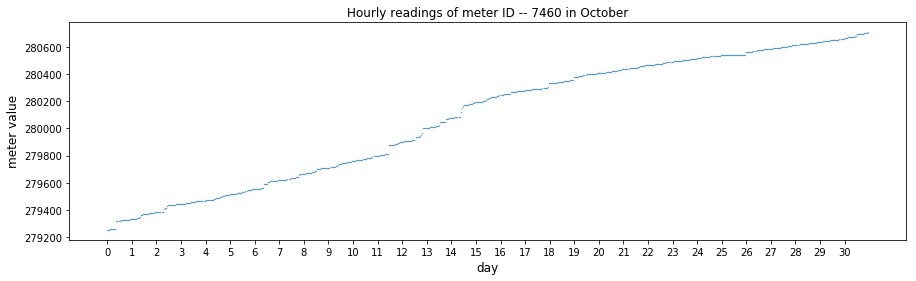

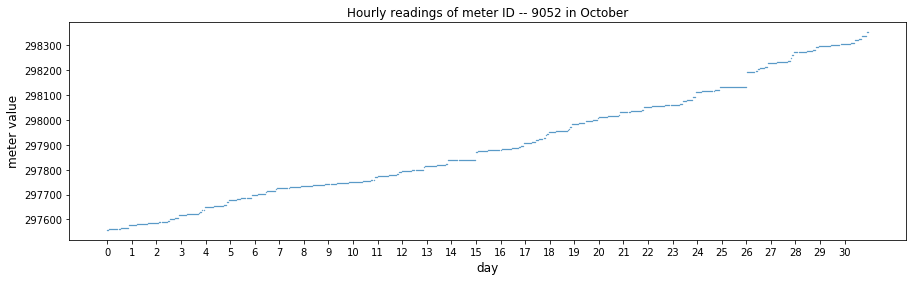

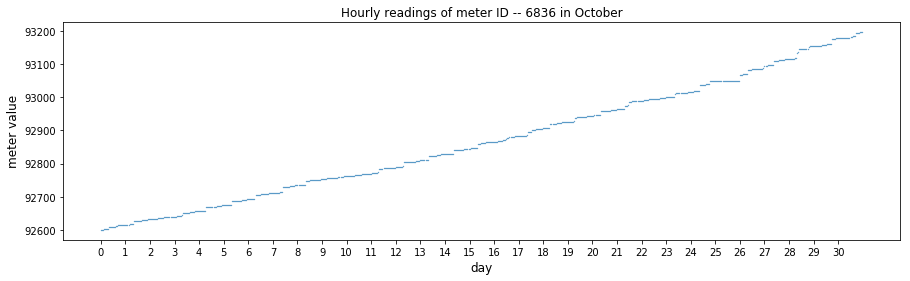

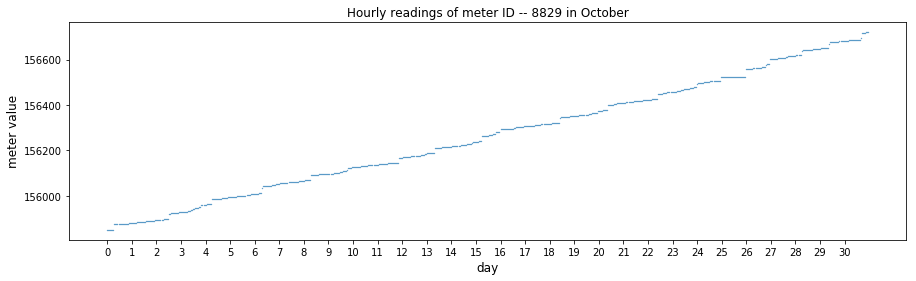

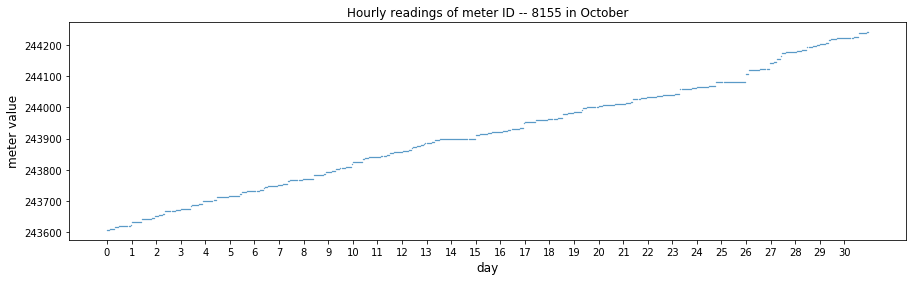

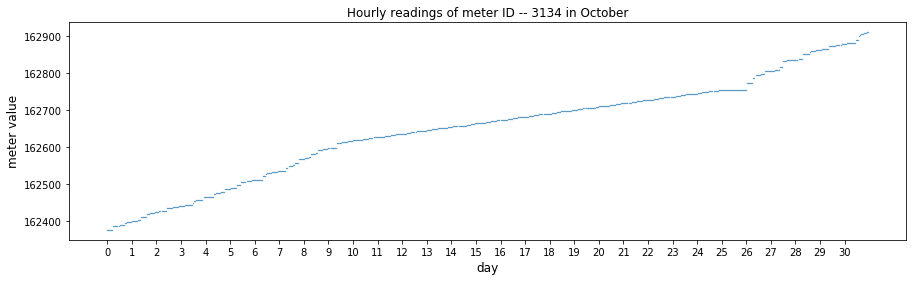

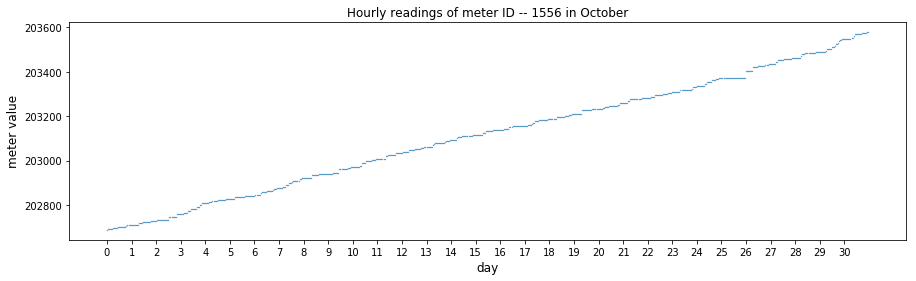

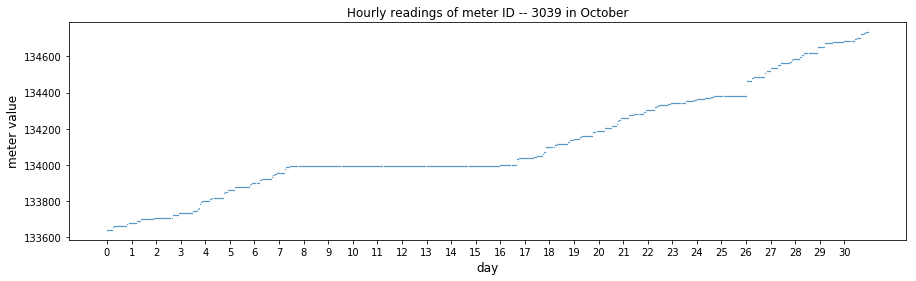

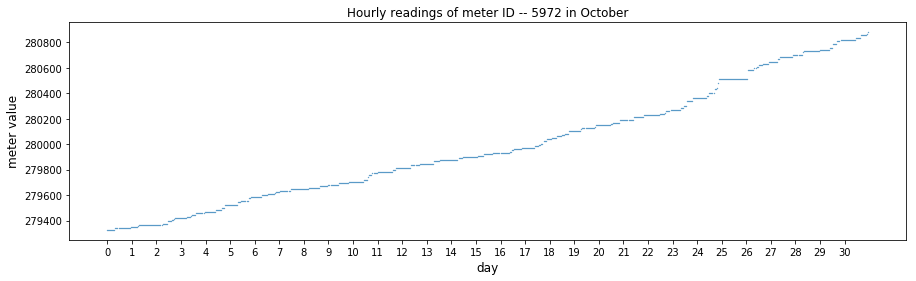

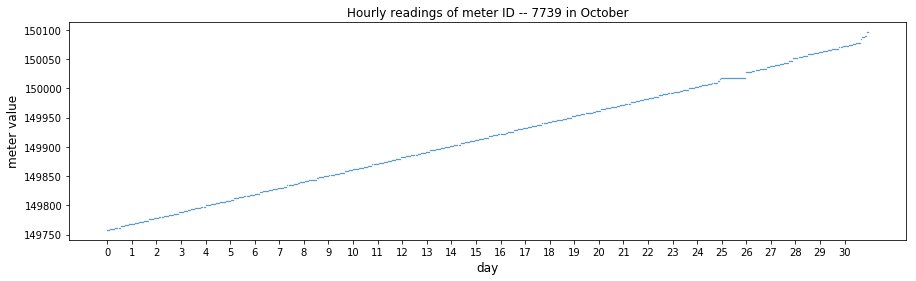

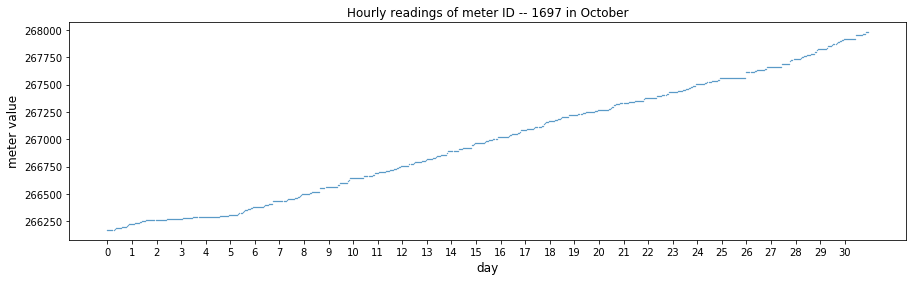

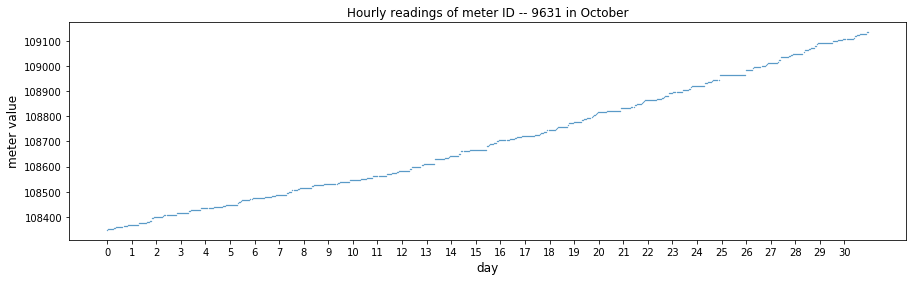

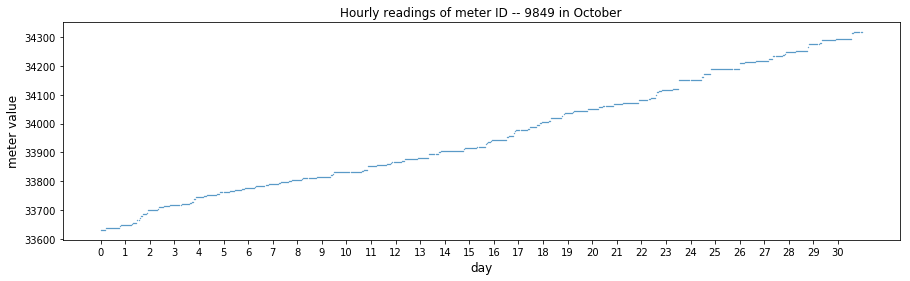

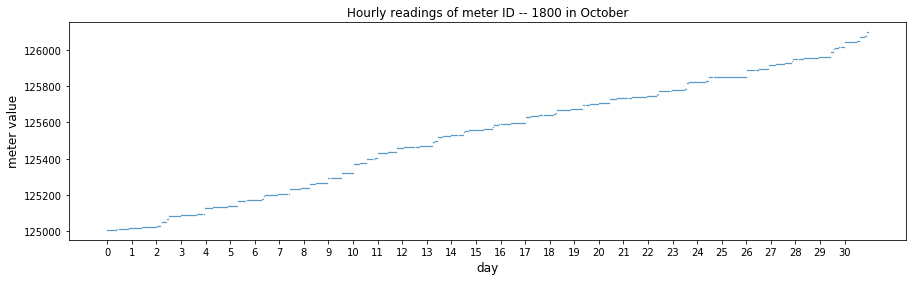

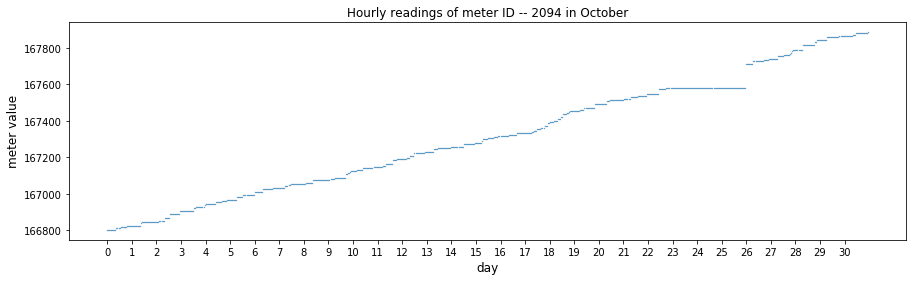

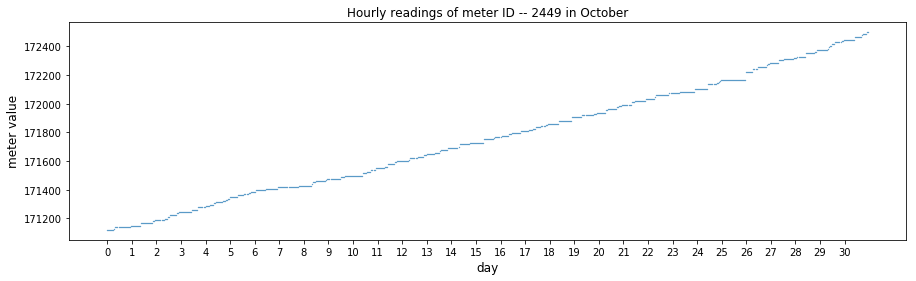

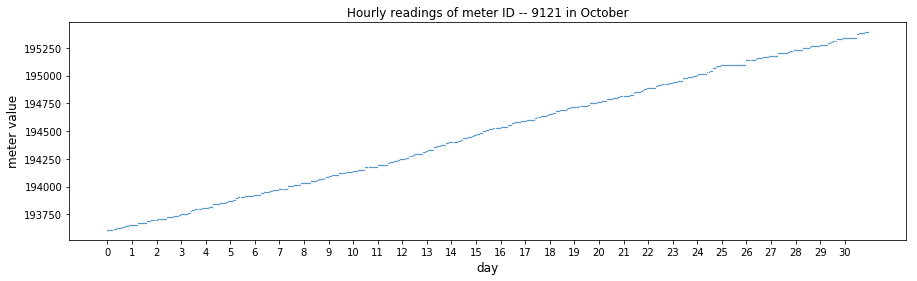

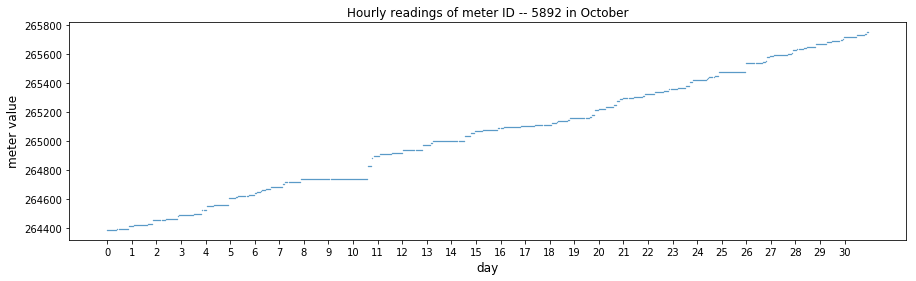

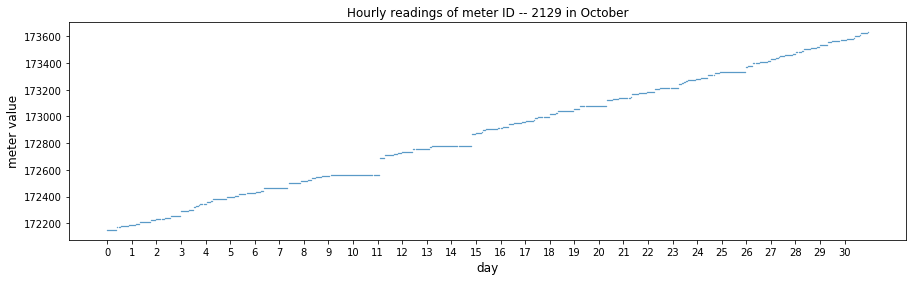

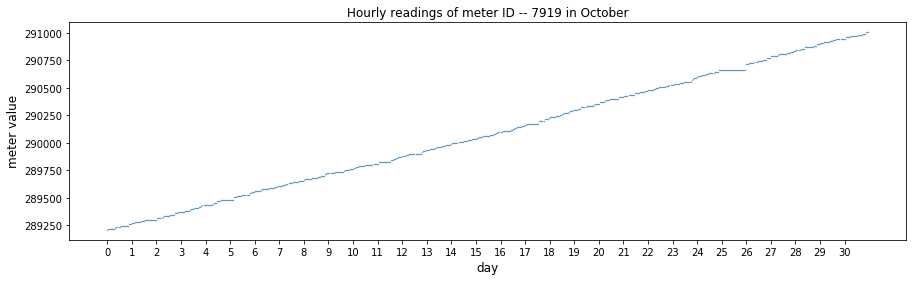

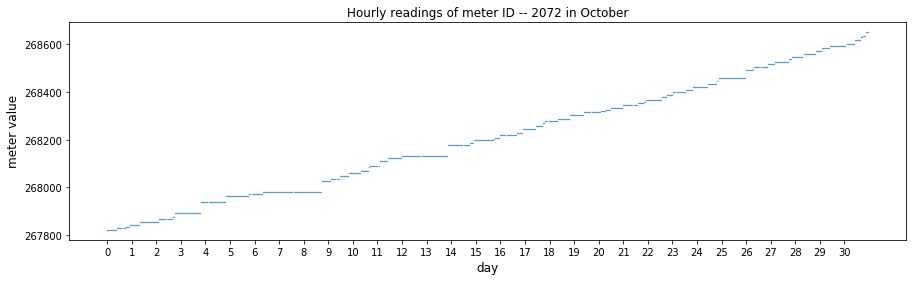

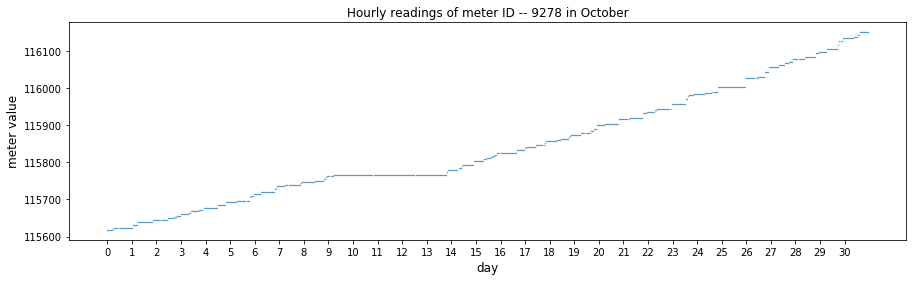

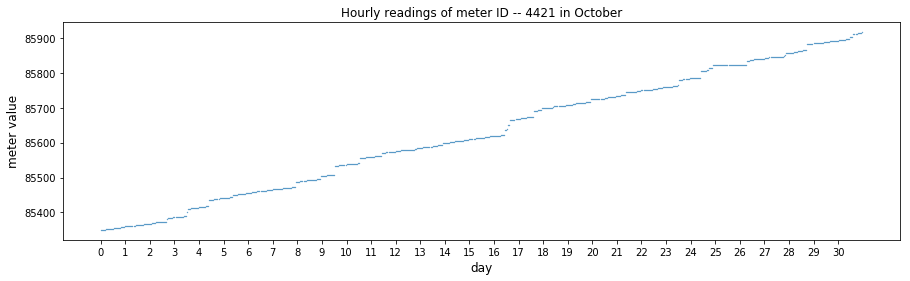

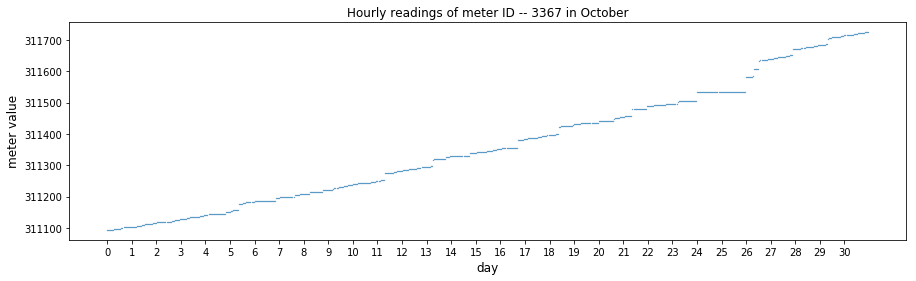

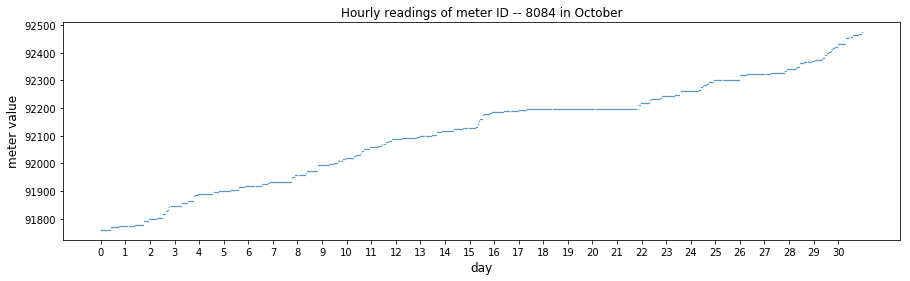

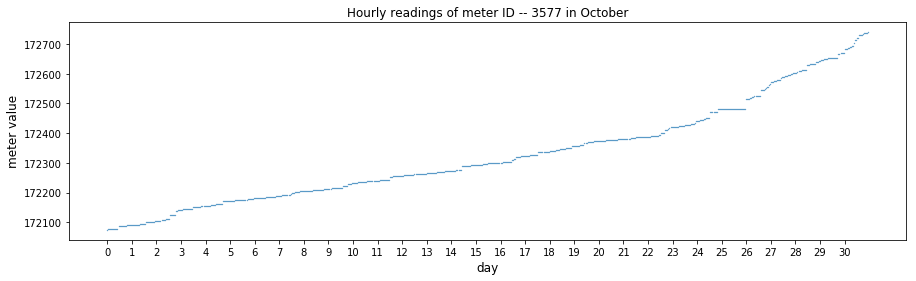

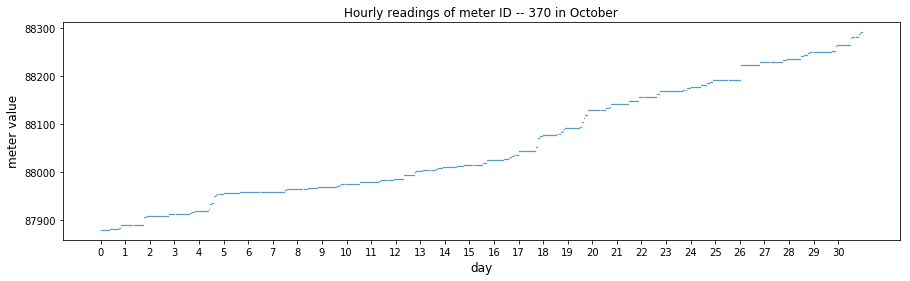

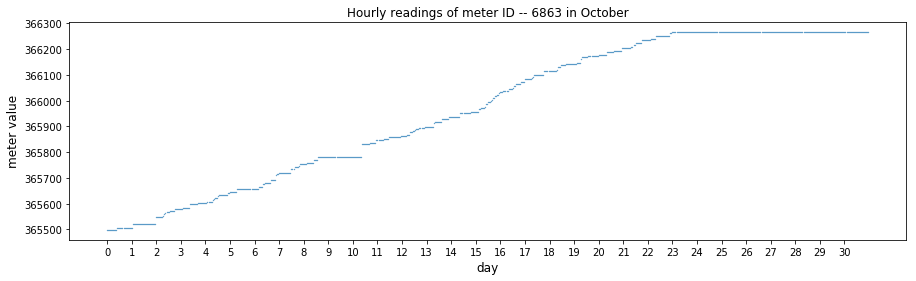

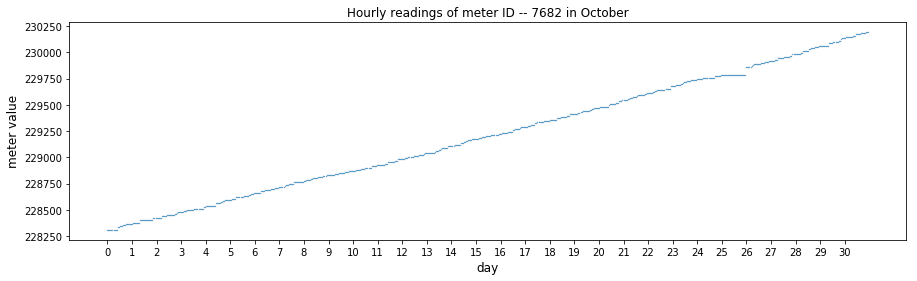

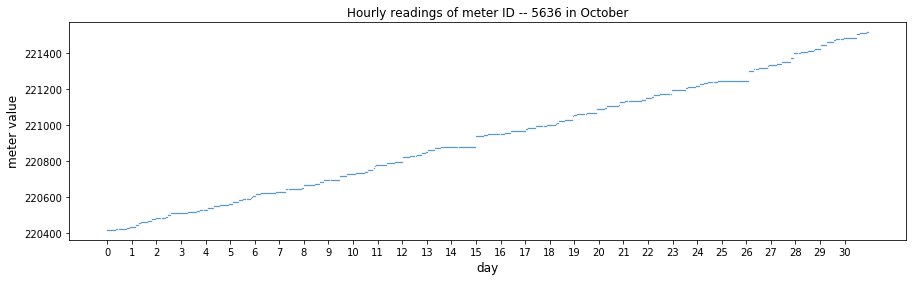

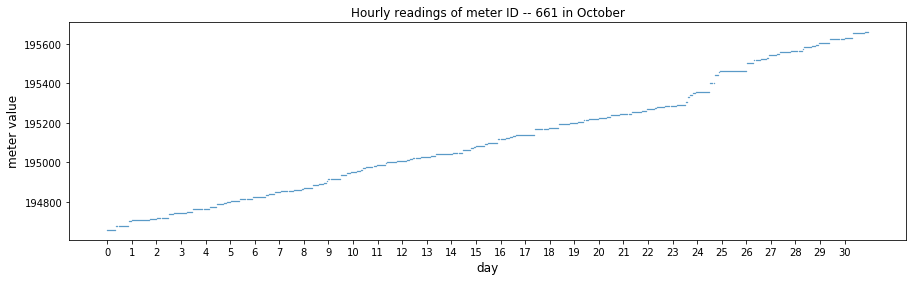

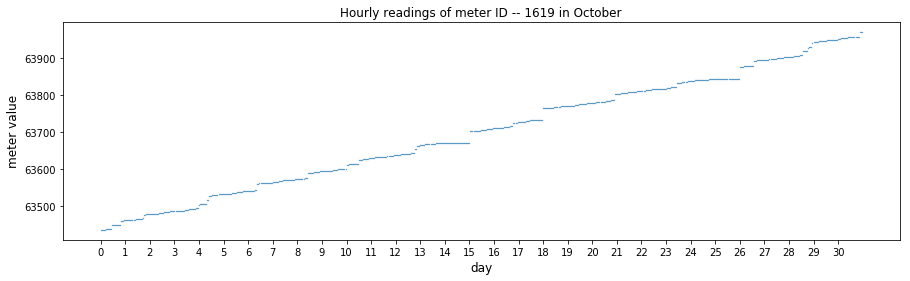

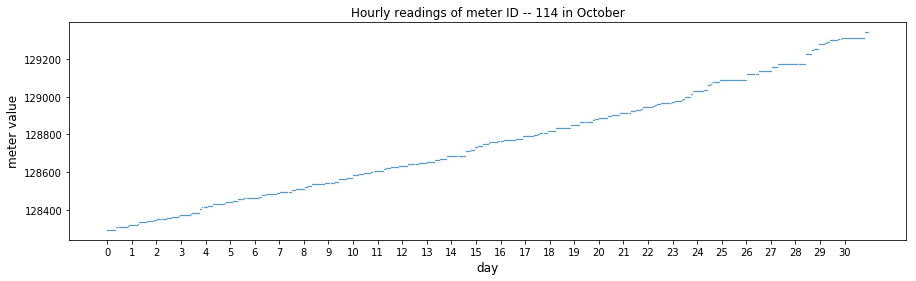

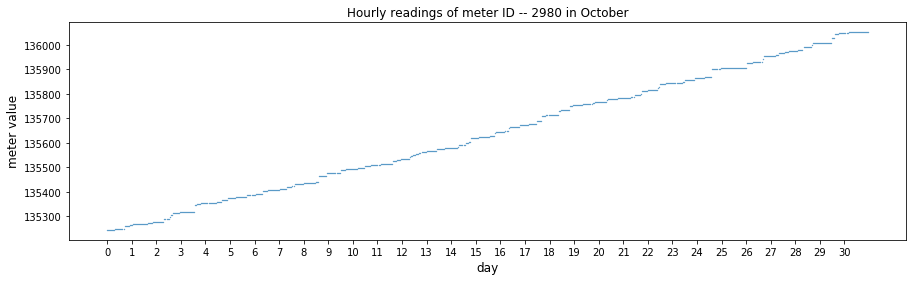

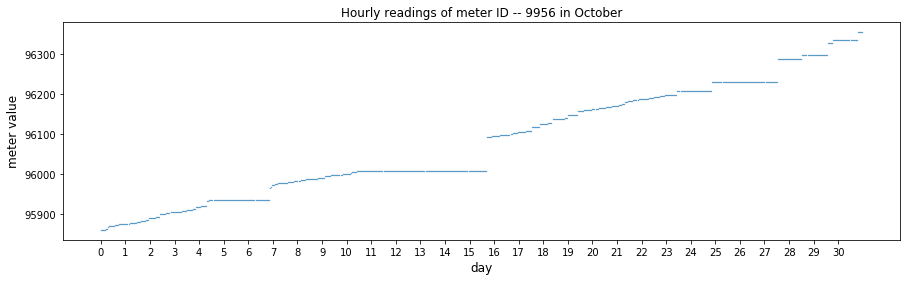

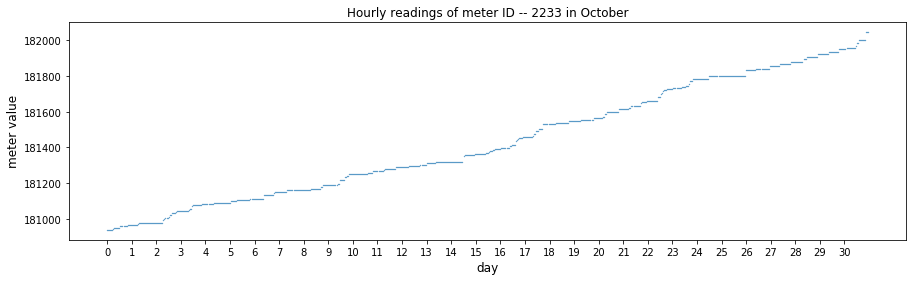

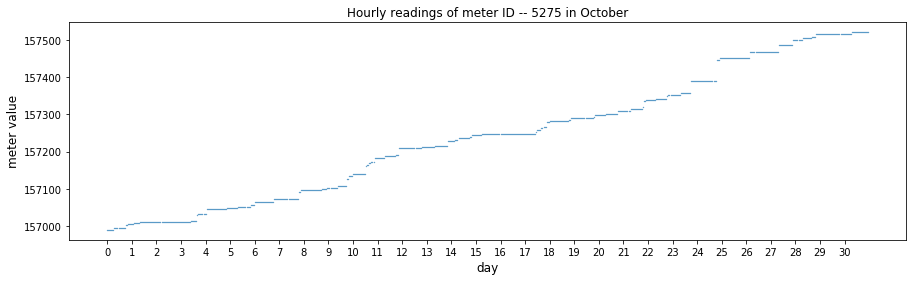

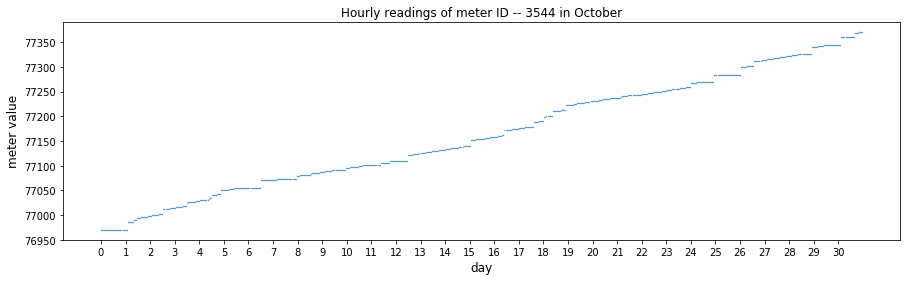

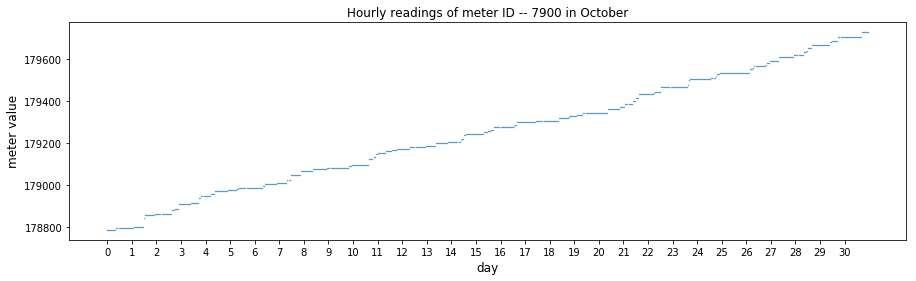

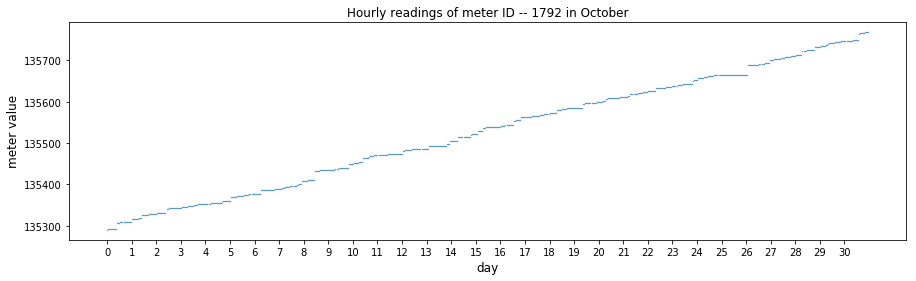

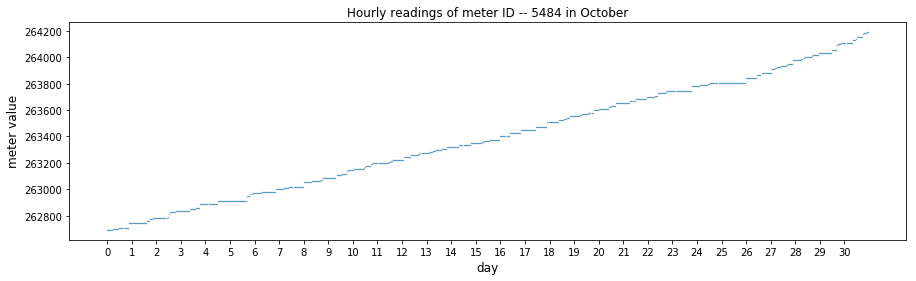

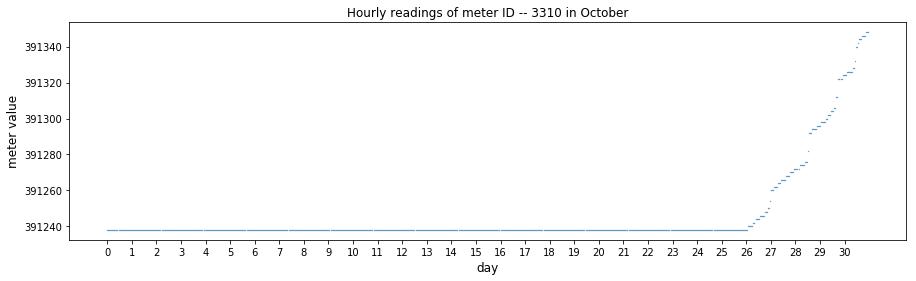

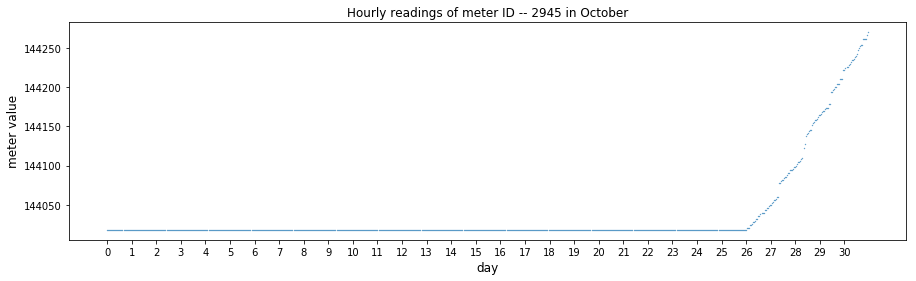

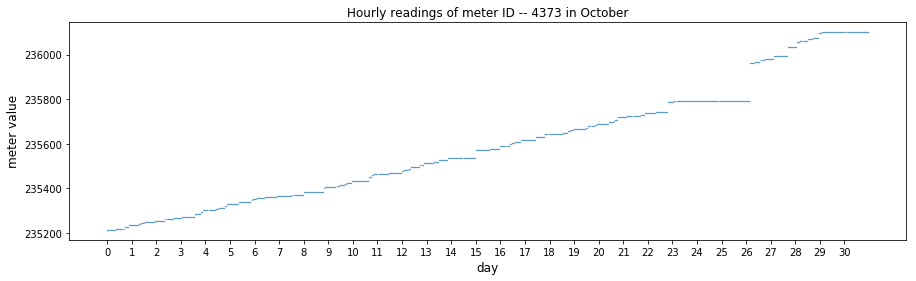

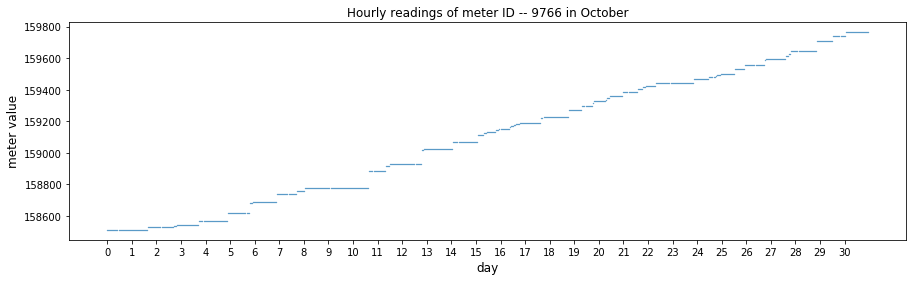

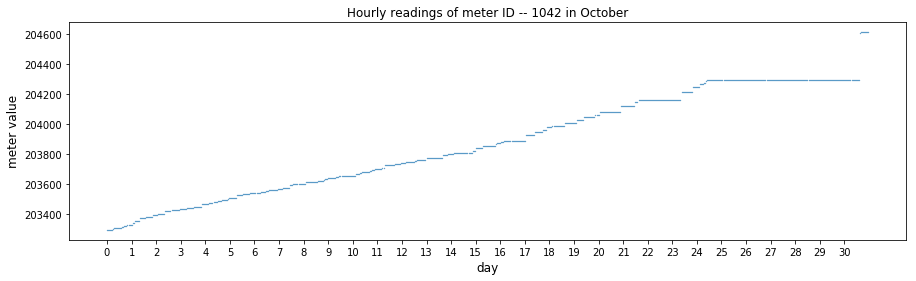

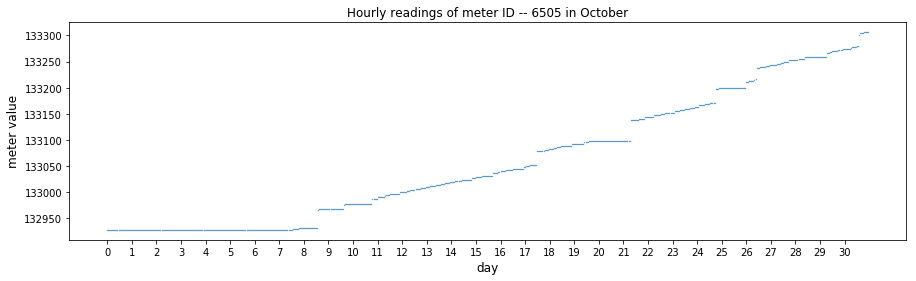

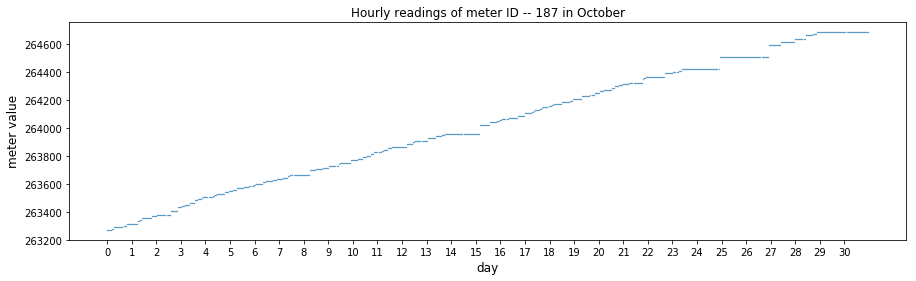

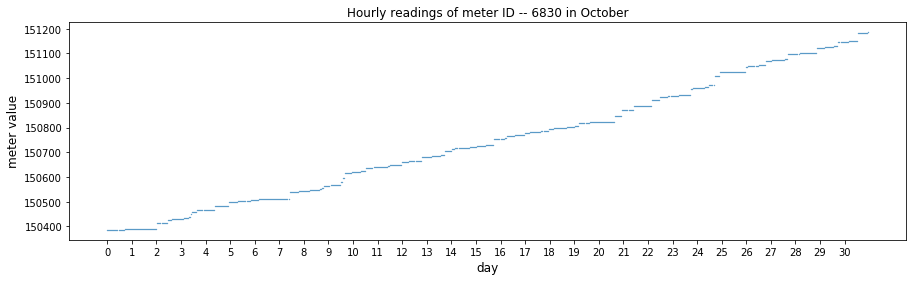

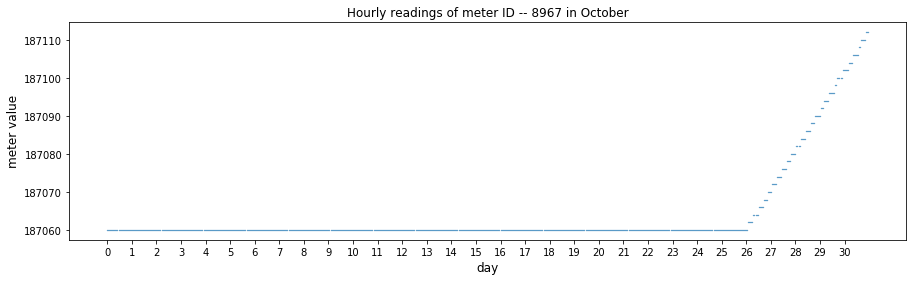

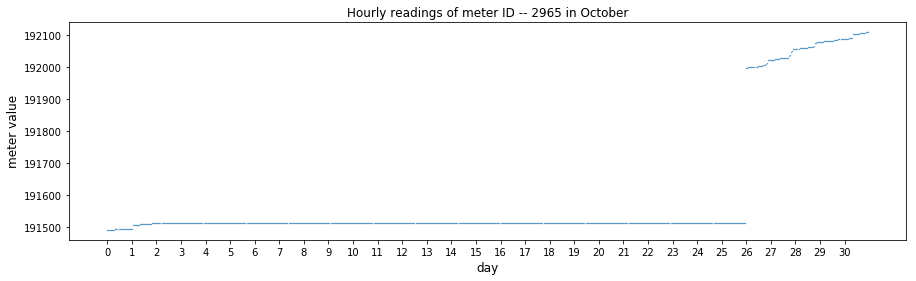

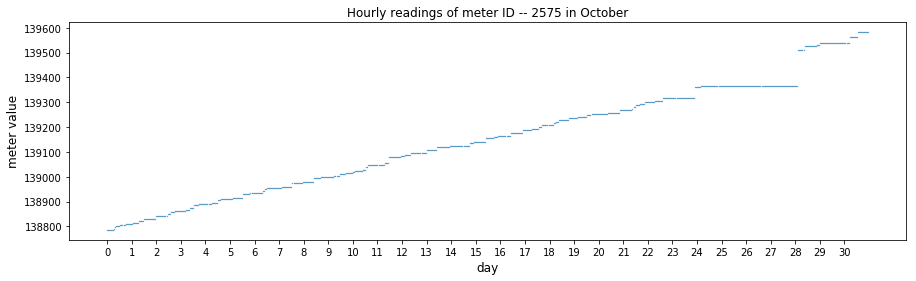

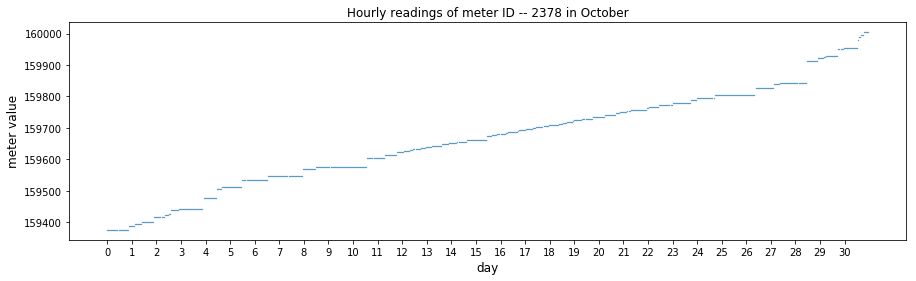

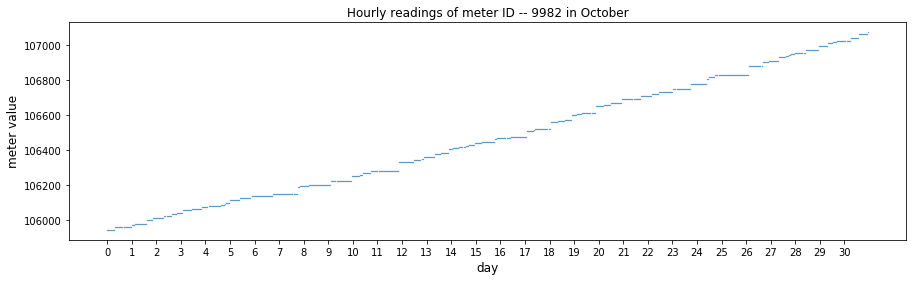

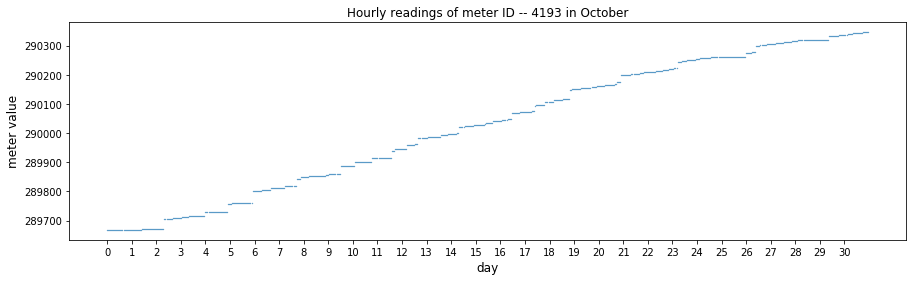

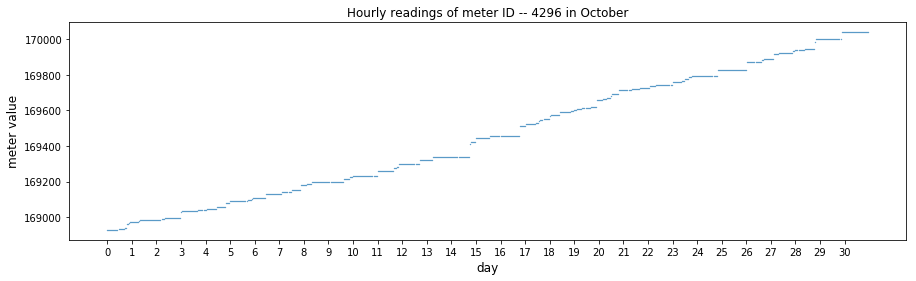

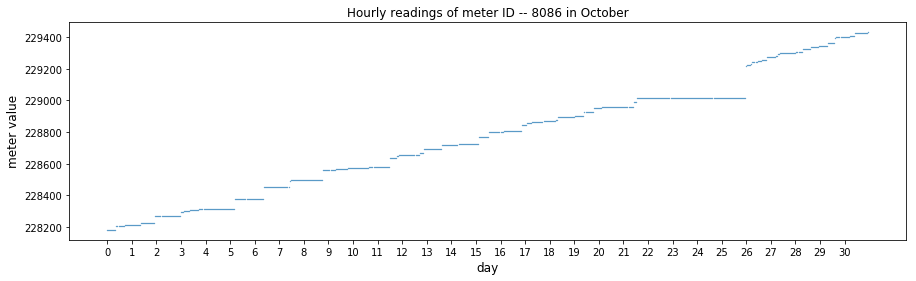

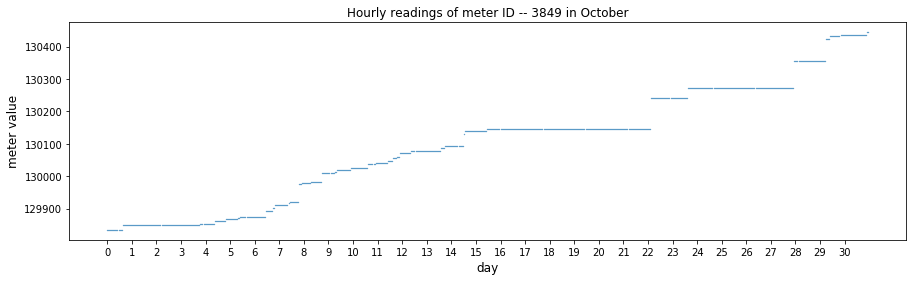

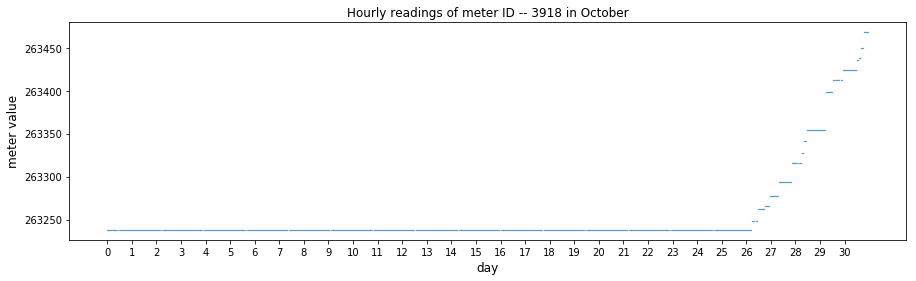

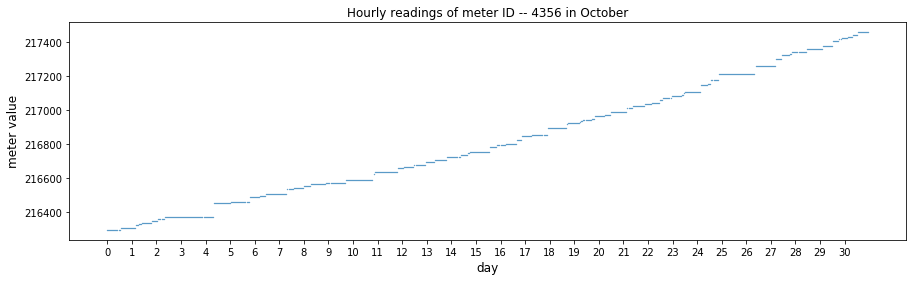

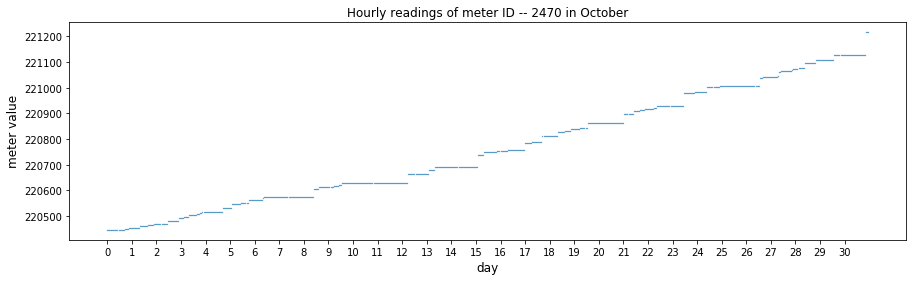

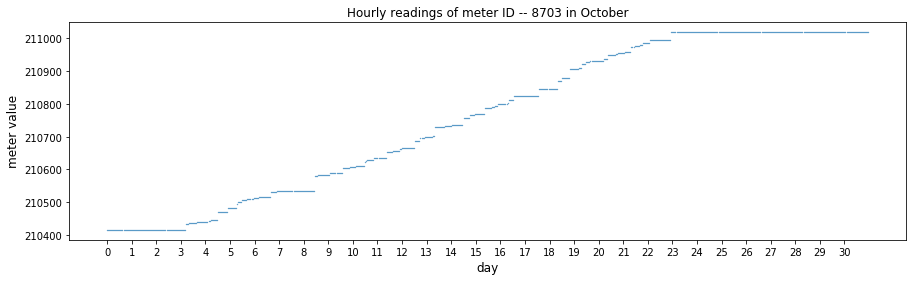

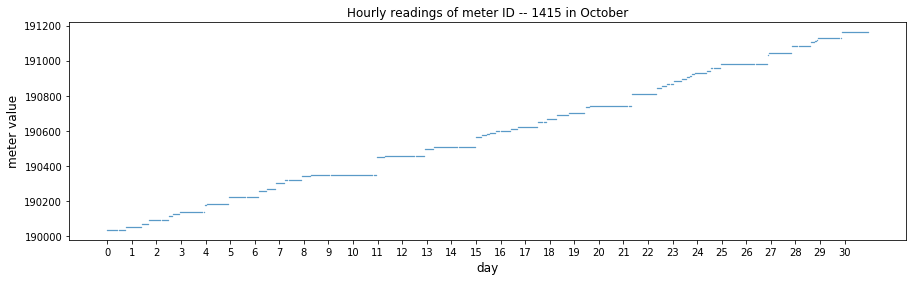

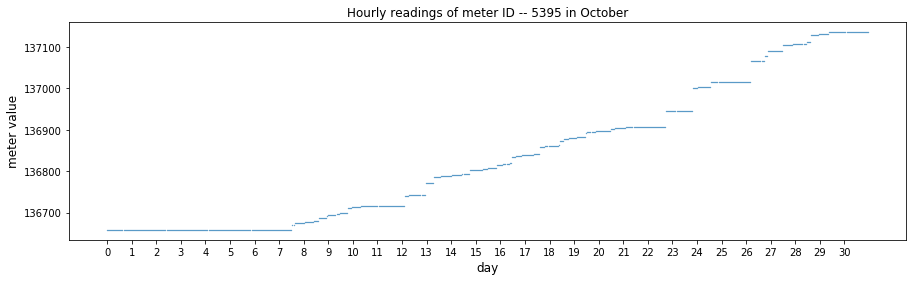

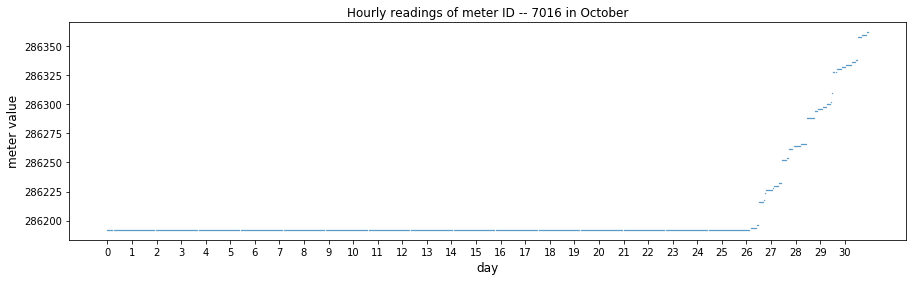

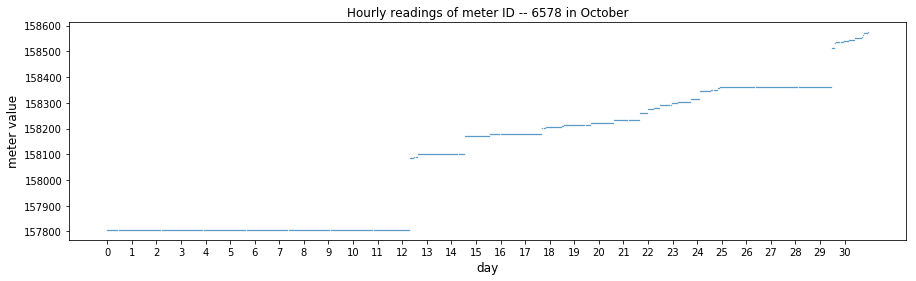

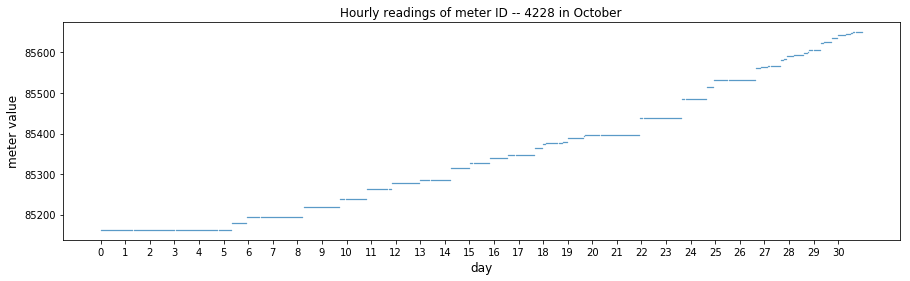

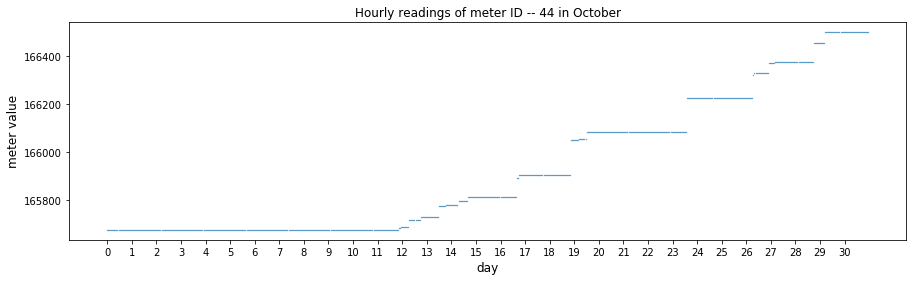

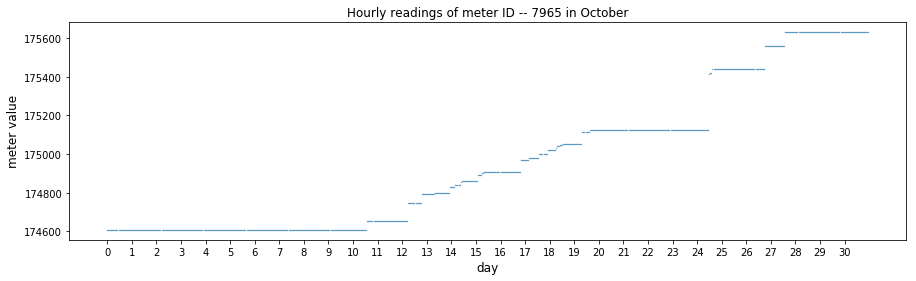

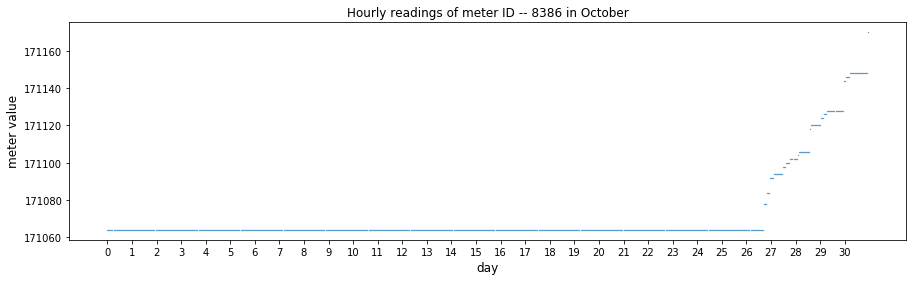

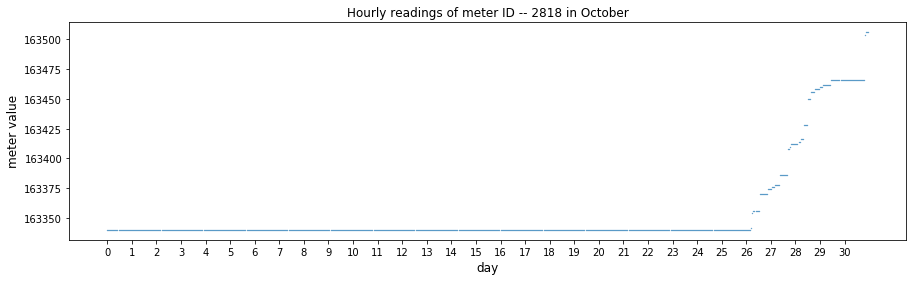

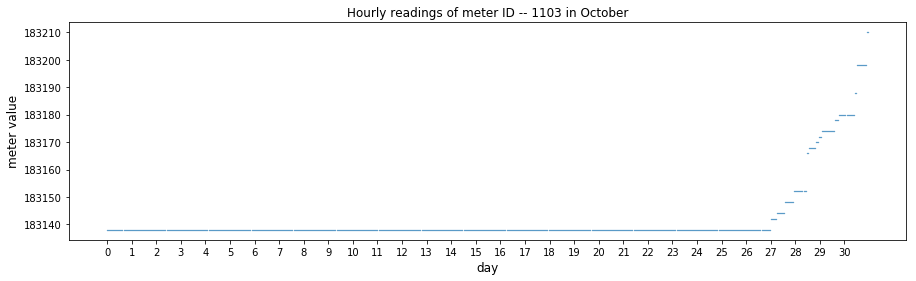

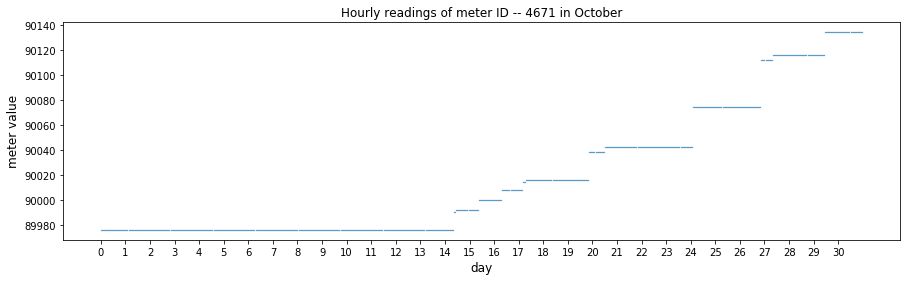

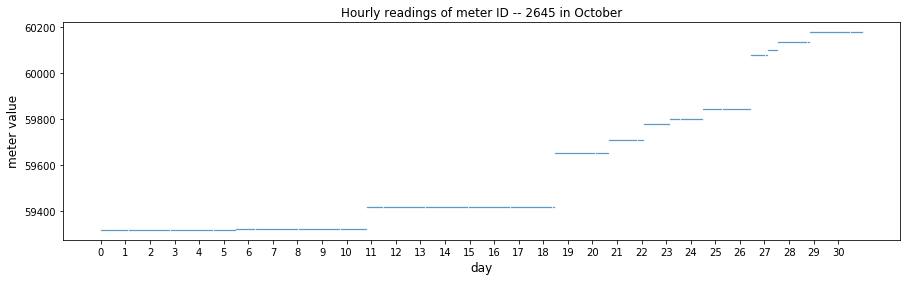

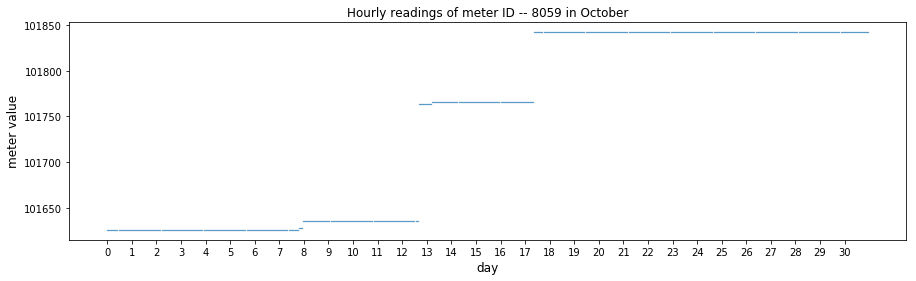

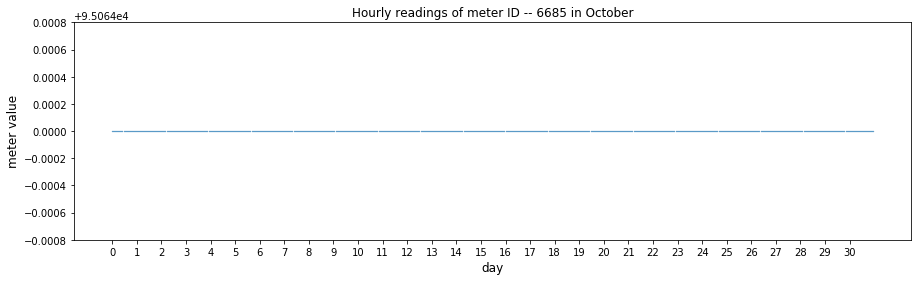

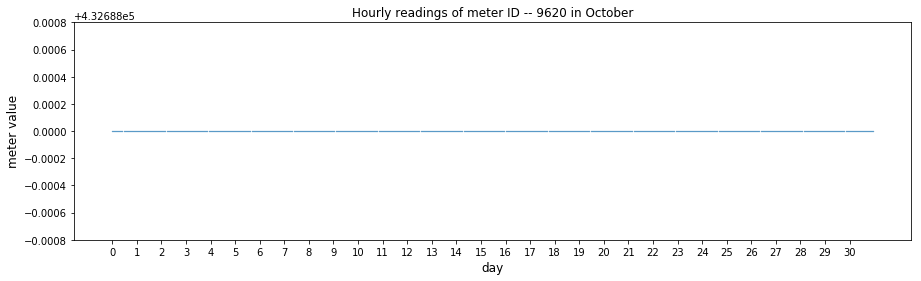

In [15]:
meter = id_count.index
#fig = plt.figure()  
#plt.figure(figsize=(20,4))
for i in meter:
    meter_value_month = df_month[df_month['dataid']==i]
    result = np.zeros(744)
    for j in range(1,32):
        meter_value_day = meter_value_month[meter_value_month['day']==j]
        if meter_value_day.empty:
            continue
        for k in range(24):
            meter_value_hour = meter_value_day[meter_value_day['hour']==k]
            if meter_value_hour.empty:
                continue
            result[(j-1)*24+k] = int(meter_value_hour['meter_value'][0:1].values)
    vac = np.where(result == 0)[0]
    non_vac = np.nonzero(result)[0]
    left = non_vac[0]
    if 0 in vac:
        result[0]= result[left]
        vac = vac[1:]
    for num in vac:
        result[num]=result[num-1]
    #print(result)
    plt.figure(figsize=(15,4))
    x_label = [x for x in range(744)]
    plt.scatter(x_label,result,s=0.1)
    plt.xlabel('day',fontsize=12)
    plt.ylabel('meter value',fontsize=12)
    plt.xticks(np.arange(744)[::24],np.arange(31))
    plt.title('Hourly readings of meter ID -- '+ str(i)+' in October')
    plt.show()  

## Q1.3 : For each home,find the top five homes with which it shows the highest correlation. 

### 1. Preprocess the data

In [16]:
date_time = []
for i in range(data_sort.shape[0]):
    date_time.append(data_sort['localminute'][i:i+1].values[0][:19]) 
month = np.zeros(data_sort.shape[0])
day = np.zeros(data_sort.shape[0])
hour = np.zeros(data_sort.shape[0])
for row in range(data_sort.shape[0]):
    month[row] = int(date_time[row][5:7])
    day[row] = int(date_time[row][8:10])
    hour[row] = int(date_time[row][11:13])
data_sort['month'] = month
data_sort['day'] = day
data_sort['hour'] = hour
df=data_sort[data_sort['month']==10]
df_month = df[['dataid','localminute','month','day','hour','meter_value']]
id_count = df_month['dataid'].value_counts()

### 2. Generate 3 types of data: 
**1. Originally hourly readings in each home(meter)  2. hourly readings from 0 in each home 3. hourly readings from 0 in each home in the first week**

In [17]:
meter = id_count.index
dict = {}
dict1 = {}
dict2={}
for i in meter:
    meter_value_month = df_month[df_month['dataid']==i]
    diff=[0 for i in range(744)]
    result=np.zeros(744)
    for j in range(1,32):
        meter_value_day = meter_value_month[meter_value_month['day']==j]
        if meter_value_day.empty:
            continue
        for k in range(24):
            meter_value_hour = meter_value_day[meter_value_day['hour']==k]
            if meter_value_hour.empty:
                continue
            result[(j-1)*24+k] = int(meter_value_hour['meter_value'][0:1].values)
    vac = np.where(result == 0)[0]
    non_vac = np.nonzero(result)[0]
    left = non_vac[0]
    if 0 in vac:
        result[0]= result[left]
        vac = vac[1:]
    for num in vac:
        result[num]=result[num-1]
    dict2[i]=result
    # transform the array format to list format    
    result=result.tolist()
    #let all the meters start from 0
    norm=result[:]
    norm[:] = [x - norm[0] for x in norm]
    norm=np.array(norm)
    dict[i]=norm
    #let all the meters start from 0，and choose one week data
    norm=result[:]
    norm[:] = [x - norm[0] for x in norm]
    norm=np.array(norm)
    dict1[i]=norm
    #compute the difference value of each hour
    #diff=result[:]
    #diff.pop(743)
    #diff.insert(0,result[0])
    #dif = [result[i] - diff[i] for i in range(744)]
    #if=np.array(dif)
    #dict1[i]= dif   

In [18]:
print(dict2[35])
print(dict[35])
#print(dict1[35])

[93470. 93470. 93470. 93470. 93470. 93470. 93472. 93472. 93472. 93472.
 93472. 93474. 93474. 93474. 93474. 93474. 93474. 93476. 93476. 93482.
 93482. 93484. 93484. 93484. 93484. 93484. 93484. 93486. 93486. 93486.
 93486. 93486. 93488. 93488. 93488. 93488. 93488. 93488. 93490. 93490.
 93490. 93490. 93508. 93510. 93516. 93522. 93522. 93522. 93522. 93522.
 93522. 93524. 93524. 93524. 93524. 93524. 93524. 93526. 93526. 93526.
 93532. 93532. 93532. 93532. 93532. 93534. 93538. 93548. 93548. 93548.
 93548. 93550. 93550. 93550. 93550. 93550. 93552. 93552. 93552. 93552.
 93560. 93560. 93568. 93568. 93568. 93570. 93570. 93570. 93570. 93570.
 93570. 93588. 93588. 93588. 93588. 93588. 93588. 93590. 93590. 93590.
 93590. 93592. 93592. 93592. 93592. 93592. 93592. 93594. 93596. 93600.
 93600. 93602. 93608. 93608. 93614. 93614. 93614. 93624. 93624. 93624.
 93624. 93624. 93626. 93626. 93626. 93626. 93626. 93626. 93626. 93632.
 93632. 93636. 93636. 93636. 93636. 93636. 93638. 93638. 93638. 93638.
 93648

### 3. Plot two types data of meter ID 35 and show the difference among them clearly 
**1.The first figure shows the trend of the first month, which has 744 hours. 2. The second figure also shows the trend of the first month, but all the values start from zero.**  

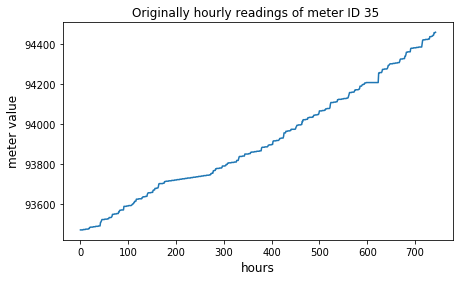

In [19]:
plt.figure(figsize=(7,4))
plt.plot(dict2[35])
plt.xlabel('hours',fontsize=12)
plt.ylabel('meter value',fontsize=12)
plt.title('Originally hourly readings of meter ID 35 ')
plt.show()

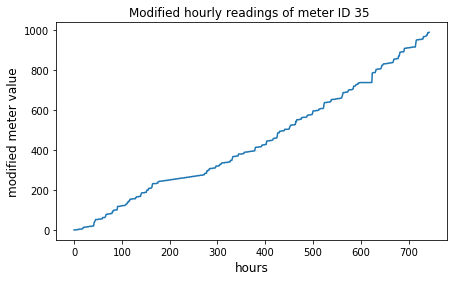

In [20]:
plt.figure(figsize=(7,4))
plt.plot(dict[35])
plt.xlabel('hours',fontsize=12)
plt.ylabel('modified meter value',fontsize=12)
plt.title('Modified hourly readings of meter ID 35 ')
plt.show()

### 4. Solution1: Use Euclidean Distance to evalue the correlation
**In this solution, i calculate all the euclidean distances from each pair of meters.For each certain meter, i choose the top five smallest distances as the evaluation standard, from which we can know the top five homes which show the highest correlation.**

In [21]:
dist3={}
meter=np.sort(meter)
print('Euclidean Distance Way:\n')
for i in meter:
    for j in meter:
        dist3[j] = np.linalg.norm( dict[i] - dict[j] )
    sor=sorted(dist3.items(),key = lambda dist2:dist2[1])
    count=0
    print('For home '+str(i)+', the top five highest correlation homes(meters):\n')
    for key,value in sor:
        count+=1
        #print(key,value)
        print(key,end=' ')
        if count>=6:
            print('\n')
            break
        

Euclidean Distance Way:

For home 35, the top five highest correlation homes(meters):

35 1801 6412 1185 744 661 

For home 44, the top five highest correlation homes(meters):

44 2645 9134 6578 3367 2470 

For home 77, the top five highest correlation homes(meters):

77 739 2034 9849 252 2470 

For home 94, the top five highest correlation homes(meters):

94 1589 744 7900 1185 661 

For home 114, the top five highest correlation homes(meters):

114 661 1589 744 1185 4998 

For home 187, the top five highest correlation homes(meters):

187 2129 5810 4514 5484 5193 

For home 222, the top five highest correlation homes(meters):

222 1283 7794 9295 7682 7919 

For home 252, the top five highest correlation homes(meters):

252 2335 9729 77 9052 9631 

For home 370, the top five highest correlation homes(meters):

370 3635 3544 7739 7117 2461 

For home 483, the top five highest correlation homes(meters):

483 3778 7017 6863 3893 7900 

For home 484, the top five highest correlation homes(

For home 7674, the top five highest correlation homes(meters):

7674 2449 1718 7030 5892 2018 

For home 7682, the top five highest correlation homes(meters):

7682 7919 9121 9295 7794 1283 

For home 7739, the top five highest correlation homes(meters):

7739 370 3544 6505 3635 8059 

For home 7741, the top five highest correlation homes(meters):

7741 5636 8156 5403 2094 9982 

For home 7794, the top five highest correlation homes(meters):

7794 9295 1283 7682 7919 9121 

For home 7900, the top five highest correlation homes(meters):

7900 94 1589 744 1185 35 

For home 7919, the top five highest correlation homes(meters):

7919 9121 7682 9295 1697 7287 

For home 7965, the top five highest correlation homes(meters):

7965 9639 4373 6412 44 1801 

For home 7989, the top five highest correlation homes(meters):

7989 7016 3918 2818 2945 3310 

For home 8059, the top five highest correlation homes(meters):

8059 6505 7739 370 3544 3635 

For home 8084, the top five highest correlation h

### 5. Solution2 : Use Root Mean Squared Error to evalue the correlation
**In this solution, i calculate all the Root Mean Squared Error from each pair of meters.For each certain meter, i choose the top five smallest values as the evaluation standard, from which we can know the top five homes which show the highest correlation.**

In [22]:
dist4={}
meter=np.sort(meter)
print('Root Mean Squared Error Way:\n')
for i in meter:
    for j in meter:
        dist4[j] = np.sqrt(metrics.mean_squared_error(dict[i], dict[j]))
    sor=sorted(dist4.items(),key = lambda dist4:dist4[1])
    count=0
    print('For home '+str(i)+', the top five highest correlation homes(meters):\n')
    for key,value in sor:
        count+=1
        print(key,end=' ')
        if count>=6:
            print('\n')
            break

Root Mean Squared Error Way:

For home 35, the top five highest correlation homes(meters):

35 1801 6412 1185 744 661 

For home 44, the top five highest correlation homes(meters):

44 2645 9134 6578 3367 2470 

For home 77, the top five highest correlation homes(meters):

77 739 2034 9849 252 2470 

For home 94, the top five highest correlation homes(meters):

94 1589 744 7900 1185 661 

For home 114, the top five highest correlation homes(meters):

114 661 1589 744 1185 4998 

For home 187, the top five highest correlation homes(meters):

187 2129 5810 4514 5484 5193 

For home 222, the top five highest correlation homes(meters):

222 1283 7794 9295 7682 7919 

For home 252, the top five highest correlation homes(meters):

252 2335 9729 77 9052 9631 

For home 370, the top five highest correlation homes(meters):

370 3635 3544 7739 7117 2461 

For home 483, the top five highest correlation homes(meters):

483 3778 7017 6863 3893 7900 

For home 484, the top five highest correlation h

For home 5814, the top five highest correlation homes(meters):

5814 1619 4352 6836 5275 5439 

For home 5892, the top five highest correlation homes(meters):

5892 7030 2449 2018 7674 5484 

For home 5972, the top five highest correlation homes(meters):

5972 5892 5484 7030 2449 7674 

For home 6412, the top five highest correlation homes(meters):

6412 35 1801 1185 744 661 

For home 6505, the top five highest correlation homes(meters):

6505 7739 370 8059 4228 3635 

For home 6578, the top five highest correlation homes(meters):

6578 2470 5129 3367 77 4732 

For home 6685, the top five highest correlation homes(meters):

6685 9620 8967 1103 8386 3310 

For home 6830, the top five highest correlation homes(meters):

6830 4031 2638 9631 1791 9729 

For home 6836, the top five highest correlation homes(meters):

6836 5814 4421 3367 1619 5275 

For home 6863, the top five highest correlation homes(meters):

6863 3778 3893 4998 7900 1589 

For home 6910, the top five highest correlation

## Q1.4 :Proposal

**1.We would like to spilt the meter data for each house into weekdays and weekends.The reason is that, gas consumption on weekdays and weekends may be different out of living habits of different day type. For example, most office workers won't stay at home for lunch on weekdays, however, they might eat at home on weekends.If we predict next hour readings with consideration of day type, the accuaracy will be increasing to some extent. **

**2.We could then find features according to the distribution disparity between weekdays and weekends. Each meter ID has a feature vector. We can also enrich the features using different analytical methods.**

**3.Moreover, Because each meter ID represents each home, we can get different labels (groups) using clustering algrithoms (K-means) such as working group, older people or big families based on the feature vector.**

**4.After having got the useful groups' information, we would like to propose a novel idea,a system, with the help of GPS. For example, the location of the medical institutions or different types of restaurant according to those age groups which provides useful information. **